# Оглавление

- [1. Предварительная обработка данных](#1.-Предварительная-обработка-данных)
  - [1.1. Чтение и загрузка данных](#1.1.-Чтение-и-загрузка-данных)
  - [1.2. Первичный анализ данных](#1.2.-Первичный-анализ-данных)
  - [1.3. Разделение выборки на обучающую и тестовую выборки](#1.3.-Разделение-выборки-на-обучающую-и-тестовую-выборки)
  - [1.4. Обработка вещественных признаков (заполнение пропусков)](#1.4.-Обработка-вещественных-признаков-(заполнение-пропусков))
  - [1.5. Кодирование категориальных признаков](#1.5.-Кодирование-категориальных-признаков)
  - [1.6. Детекция выбросов и аномалий в данных](#1.6.-Детекция-выбросов-и-аномиалиях-в-данных)
  - [1.7. Подведение итогов раздела 1](#1.7.-Подведение-итогов-раздела-1)
- [2. Генерация новых признаков](#2.-Генерация-новых-признаков)
  - [2.1. Корреляционный анализ входных признаков (построение тепловых карт корреляции)](#2.1.-Корреляционный-анализ-входных-признаков-(построение-тепловых-карт-корреляции))
  - [2.2. Исправление проблемы мультиколлинеарности в данных](#2.2.-Исправление-проблемы-мультиколлинеарности-в-данных)
  - [2.3. Скалирование данных](#2.3.-Скалирование-данных)
  - [2.4. Подведение итогов раздела 2](#2.4.-Подведение-итогов-раздела-2)
- [3. Выбор моделей ML и метрик](#3.-Выбор-моделей-ML-и-метрик)
  - [Ячейки для выбора моделей ML](#ячейки-для-выбора-моделей-ML)
  - [Ячейки для выбора метрик](#ячейки-для-выбора-метрик)
- [4. Обучение моделей ML и подбор гиперпараметров](#4.-Обучение-моделей-ML-и-подбор-гиперпараметров)
- [5. Вычисление метрик на новых данных](#5.-Вычисление-метрик-на-новых-данных)
- [6. Результат работы](#6.-Результат-работы)

<!-- Примечание: ссылки ведут на заголовки по их текстовым именам. Если якоря отображаются иначе в вашей среде, можно адаптировать ссылки или использовать расширение оглавления в VSCode. -->

Задача заключается в прогнозировании коэффициента `Гармония Бессмертия` (целевой признак), который отражает состояние магического ядра портала и его стабильность. Этот коэффициент является непрерывной величиной (пример значения: 0.975), что указывает на задачу регрессии. Цель — предсказать изменения этого коэффициента на основе входных параметров работы портала, чтобы вовремя вмешаться и предотвратить разрушение артефакта.

### Описание признакового пространства
#### Входные признаки
Все параметры, описывающие работу портала, кроме целевого и уникальных идентификаторов. Они включают числовые измерения (скорости, потоки, температуры, давления) и категориальные (тип вектора мощи).

#### Целевой признак
`Гармония Бессмертия` — непрерывный коэффициент стабильности (диапазон: [0, 1], где 1 — идеальное состояние, <1 — угасание).
#### Таблица с описанием признаков
| **№** | **Признак**               | **Описание**                                                                 | **Особенности** |
|-------|---------------------------|-----------------------------------------------------------------------------|-------------|
| 1     | Вектор Мощи              | Позиция магического механизма, управляющего интенсивностью перехода через портал. | >0          |
| 2     | Скорость перехода через портал | Скорость, с которой портал перемещает объект через пространство.            | >0          |
| 3     | Приток Силы Потока       | Поток магической силы, текущий через ядро портала, обеспечивая его стабильную работу. | >0          |
| 4     | Ритм магического ядра    | Число оборотов магического ядра портала в минуту.                           | >0          |
| 5     | Поток Энергий            | Число оборотов генератора эфира, преобразующего внешнюю энергию в магическую. | >0          |
| 6     | Сила Левого Потока       | Мощность магического потока, текущего через левую сторону портала, поддерживая его баланс. | >0          |
| 7     | Сила Правого Потока      | Мощность магического потока, текущего через правую сторону портала, обеспечивая равномерное распределение энергии. | >0          |
| 8     | Пламя Стихий             | Температура магической энергии, исходящей из высокого магического источника портала, в градусах Цельсия. | >0          |
| 9     | Температура вдоха Истока | Температура воздуха, входящего в магический ускоритель портала, в градусах Цельсия. | >0          |
| 10    | Температура выдоха Истока | Температура воздуха, исходящего из магического ускорителя портала, в градусах Цельсия. | >0          |
| 11    | Приток давления Выдоха Истока | Давление магического потока на выходе из магического источника высокого давления. | >0          |
| 12    | Давление вдоха Истока    | Давление воздуха, входящего в магический ускоритель.                        | >0          |
| 13    | Давление выдоха Истока   | Давление воздуха, исходящего из магического ускорителя.                     | >0          |
| 14    | Древний Ветер            | Давление древней магической энергии, покидающей портал в виде выхлопного потока. | >0          |
| 15    | Печать Чародея           | Параметр управления магическим впрыском в сердце портала, выраженный в процентах. | >=0          |
| 16    | Эмульсия Истока          | Количество магического топлива, подпитывающего портал.                     | >0          |
| 17    | Дыхание Истока           | Коэффициент, отображающий степень угасания магического ускорителя.          | >0          |
| 18    | Гармония Бессмертия - целевая переменная | Коэффициент, указывающий на состояние магического ядра портала и его стабильность, требующий магического восстановления в случае снижения. | >0|
| 19    | Тип Вектора Мощи         | Метка типа позиции магического механизма.                                  | Категориальный признак|
| 20    | Номер пометки            | Уникальный номер записи о работе портала в блакноте.                        | Нужно исключить этот признак|


#### **Формулы прикладной области**
1. **Общая мощность потоков**:
   - Сумма `Силы Левого Потока` и `Силы Правого Потока`:
     $$   P_{\text{потоки}} = \text{Сила Левого Потока} + \text{Сила Правого Потока}   $$
   - Совокупная сила всех потоков:
     $$   P_{\text{все потоки}} = \text{Сила Левого Потока} + \text{Сила Правого Потока} + \text{Приток Силы Потока}   $$

2. **Общая сила ядра**:
   $$   P_{\text{ядро}} = \text{Ритм магического ядра} \times \text{Приток Силы Потока}   $$

3. **Общее давление на выходе**:
   $$   P_{\text{давление}} = \text{Приток давления Выдоха Истока} + \text{Давление выдоха Истока}   $$

4. **Магическая производительность**:
   $$   \text{Производительность} = \frac{\text{Скорость перехода через портал}}{\text{Эмульсия Истока}}   $$

5. **Эффективность ядра**:
   $$   \text{Эффективность ядра} = \frac{P_{\text{ядро}}}{\text{Эмульсия Истока}}   $$

6. **Магическая мощность**:
   $$   P_{\text{магическая}} = \text{Эмульсия Истока} \times P_{\text{давление}} \times |\text{Пламя Стихий} - \text{Температура вдоха Истока}|   $$

7. **Степень износа магических источников**:
   $$   \text{Износ} = \frac{\text{Дыхание Истока}}{\text{Гармония Бессмертия}}   $$

8. **Расхождение в стабильности магии**:
   $$   \text{Расхождение} = |\text{Дыхание Истока} - \text{Гармония Бессмертия}|   $$

9. **Баланс угасания**:
   $$   \text{Баланс угасания} = \frac{\text{Дыхание Истока} - \text{Гармония Бессмертия}}{\text{Скорость перехода через портал}}   $$

#### Анализ зависимостей и формул
Следующие формулы могут быть использованы для создания новых признаков в задаче предсказания `Гармонии Бессмертия`:
- **Общая мощность потоков** (1): Учитывает ключевые параметры потоков, которые могут коррелировать с целевым признаком.
- **Общая сила ядра** (2): Отражает производительность ядра, влияющую на стабильность портала.
- **Общее давление на выходе** (3): Может быть связано с устойчивостью работы портала.
- **Магическая производительность** (4): Показывает эффективность использования топлива, что может влиять на стабильность.
- **Эффективность ядра** (5): Характеризует производительность ядра относительно топлива.
- **Магическая мощность** (6): Комплексный показатель, учитывающий давление и температуру, потенциально связанный с целевым признаком.

Следующие формулы нельзя использовать напрямую, так как они включают целевой признак (`Гармония Бессмертия`) в свои вычисления, что приведет к утечке данных в задаче регрессии:
- **Степень износа магических источников** (7): Использует `Гармонию Бессмертия` в знаменателе, что делает её непригодной для создания признаков.
- **Расхождение в стабильности магии** (8): Прямо использует целевой признак, что может привести к утечке данных.
- **Баланс угасания** (9): Также включает `Гармонию Бессмертия`, что исключает её из feature engineering.



**Формирование окружения для работы**

Первоначально необходимо подготовить окружение для работы с данными и их моделирования. Чтобы не возникало конфликтов виртуальной среды Python, зафиксируем используемые в ходе исследования версии основных библиотек и фреймворков, которые будут использоваться далее. А также пропишем последовательность команд для формирования среды.

### Создание виртуального окружения

**Версия Python: 3.12.3**

Для Windows (PowerShell):
```powershell
# Создание виртуального окружения
python -m venv venv

# Активация виртуального окружения
.\venv\Scripts\Activate.ps1

# Обновление pip
python -m pip install --upgrade pip

# Установка библиотек
pip install pandas numpy matplotlib seaborn scikit-learn scipy plotly pyod joblib
```


### Таблица используемых библиотек и модулей

| **Библиотека/Модуль** | **Назначение** |
|------------------------|----------------|
| `pandas` | Работа с табличными данными, анализ DataFrame |
| `numpy` | Численные вычисления, работа с массивами |
| `matplotlib.pyplot` | Построение графиков и визуализаций |
| `seaborn` | Статистическая визуализация данных |
| `plotly.express` | Интерактивные графики и визуализации |
| `warnings` | Управление предупреждениями Python |
| `joblib` | Сохранение и загрузка моделей ML |
| `pyod.models` | Библиотека для обнаружения выбросов |
| `pkgutil` | Работа с пакетами Python |
| `typing` | Аннотации типов для улучшения читаемости кода |
| `sklearn.model_selection` | Разделение данных на обучающую и тестовую выборки |
| `sklearn.preprocessing` | Кодирование категориальных признаков, масштабирование данных |
| `sklearn.impute` | Заполнение пропущенных значений |
| `sklearn.ensemble` | Алгоритмы ансамблевого обучения (Isolation Forest) |
| `sklearn.svm` | Метод опорных векторов для детекции аномалий |
| `sklearn.decomposition` | Методы понижения размерности (PCA) |
| `sklearn.cluster` | Алгоритмы кластеризации (DBSCAN) |
| `sklearn.metrics` | Метрики качества моделей |
| `scipy.stats` | Статистические функции и распределения |

In [16]:
import pandas as pd
import numpy as np
import typing as t
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
import plotly.express as px
import pyod.models
import pkgutil

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import mean_squared_error
from scipy import stats
from scipy.stats import entropy

warnings.filterwarnings('ignore')

# Фиксация seed для воспроизводимости
SEED = 42
np.random.seed(SEED)
print('Импорты выполнены, SEED =', SEED)

Импорты выполнены, SEED = 42


Для воспроизводимости результатов исследования зафиксируем основание генератора случайных чисел, который используется для деления выборки на обучение и тест, а также при обучении моделей.

Импорты выполнены успешно, seed зафиксирован.

# 1. Предварительная обработка данных

## 1.1. Чтение и загрузка данных 

In [17]:
df = pd.read_csv('portal_data.csv', sep='|', encoding='cp1251')
df

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия,Тип Вектора Мощи,Номер пометки
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736,-,1.096,Не определено,5.947,-,7.137,0.082,0.95,0.975,Слабый,0
1,2.088,-,6960.180,144.111767,6828.469,28.204,28.204,635.401,736,581.658,1.331,1.394603,7.282,1.019,10.655,0.287,0.95,0.975,Слабый,1
2,3.144,4.6299600000000005,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,-,1.389,Не определено,7.574,-,13.086,0.259,0.95,0.975,Ниже среднего,2
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,-,1.658,Не определено,9.007,-,18.109,0.358,0.95,0.975,Ниже среднего,3
4,5.140,7.7166,21636.432,201.513586,8494.777,175.306,175.306,731.494,736,645.642,2.078,Не определено,11.197,1.026,26.373,0.522,0.95,0.975,Выше среднего,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,7.7166,21624.934,201.516623,8470.013,175.239,175.239,681.658,736,628.95,2.087,Не определено,10.990,1.027,23.803,0.471,1.00,1.000,Выше среднего,11929
11930,6.175,9.25992,29763.213,241.561772,8800.352,245.954,245.954,747.405,736,-,2.512,Не определено,13.109,-,32.671,0.647,1.00,1.000,Выше среднего,11930
11931,7.148,10.80324,39003.867,280.444950,9120.889,332.389,332.389,796.457,736,680.393,2.982,Не определено,15.420,1.036,42.104,0.834,1.00,1.000,Сильный,11931
11932,8.206,12.34656,50992.579,323.315332,9300.274,438.024,438.024,892.945,736,-,3.594,Не определено,18.293,-,58.064,1.149,1.00,1.000,Сильный,11932


Данные успешно загружены из CSV файла. Размер датасета: 11934 строки, 20 столбцов.

## 1.2. Первичный анализ данных

Проверяем типы данных с помощью `info()` и число уникальных значений с помощью `nunique()`.

In [18]:
df.info()
print('\n' + '='*50 + '\n')
df.nunique()
print('\n' + '='*50 + '\n')
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Вектор Мощи                     11934 non-null  float64
 1   Скорость перехода через портал  11934 non-null  object 
 2   Приток Силы Потока              11934 non-null  float64
 3   Ритм магического ядра           11934 non-null  float64
 4   Поток Энергий                   11934 non-null  float64
 5   Сила Левого Потока              11934 non-null  float64
 6   Сила Правого Потока             11934 non-null  float64
 7   Пламя Стихий                    11934 non-null  float64
 8   Температура вдоха Истока        11934 non-null  int64  
 9   Температура выдоха Истока       11934 non-null  object 
 10  Приток давления Выдоха Истока   11934 non-null  float64
 11  Давление вдоха Истока           11934 non-null  object 
 12  Давление выдоха Истока          

,Вектор Мощи,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Приток давления Выдоха Истока,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия,Номер пометки
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000,11934.000000
mean,5.166667,27247.498685,223.711688,8200.947312,227.335768,227.335768,735.495446,736.0,2.352963,12.297123,33.641261,0.662440,0.97500,0.9875,5966.500000
std,2.626388,22148.613155,81.061874,1091.315507,200.495889,200.495889,173.680552,0.0,1.084770,5.337448,25.841363,0.507132,0.01472,0.0075,3445.193391
min,1.138000,253.547000,136.939406,6589.002000,5.304000,5.304000,442.364000,736.0,1.093000,5.828000,0.000000,0.068000,0.95000,0.9750,0.000000
25%,3.144000,8375.883750,145.220958,7058.324000,60.317000,60.317000,589.872750,736.0,1.389000,7.447250,13.677500,0.246000,0.96200,0.9810,2983.250000
50%,5.140000,21630.659000,201.514947,8482.081500,175.268000,175.268000,706.038000,736.0,2.083000,11.092000,25.276500,0.496000,0.97500,0.9875,5966.500000
75%,7.148000,39001.426750,280.447777,9132.606000,332.364750,332.364750,834.066250,736.0,2.981000,15.658000,44.552500,0.882000,0.98800,0.9940,8949.750000
max,9.300000,72784.872000,372.879926,9797.103000,645.249000,645.249000,1115.797000,736.0,4.560000,23.140000,92.556000,1.832000,1.00000,1.0000,11933.000000


Проведен первичный анализ данных: определены типы данных (13 float64, 2 int64, 5 object), количество уникальных значений по каждому признаку. Выявлены потенциальные проблемы: строковые значения в числовых колонках, пропущенные значения в некоторых признаках.

Удаляем `Номер пометки` как неинформативный идентификатор. Преобразуем строковые значения в NaN и приводим числовые столбцы к float. Также удаляем бесполезные признаки из-за их постоянных значений: `Температура вдоха Истока` и `Давление вдоха Истока`.

Несмотря на то что у столбцов `Поток Энергий` и `Пламя Стихий` много уникальных значений, их можно оставить, так как являются float значениями и имеют границы разбросов ~6000-9999 и ~400-1200 соответственно. А вот признак `Приток Силы Потока` имеет огромный разброс значений от 200 до 70000+, поэтому в будущем необходимо повторно оценить пользу этого признака.

In [19]:
df.drop(columns=['Номер пометки'], inplace=True)
df = df.replace(['-', 'Не определено'], np.nan)
numeric_cols = df.columns.drop(['Тип Вектора Мощи', 'Гармония Бессмертия'])
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.drop(columns=['Температура вдоха Истока', 'Давление вдоха Истока'])

Выполнена первичная очистка данных: удален неинформативный признак 'Номер пометки', строковые значения преобразованы в NaN, числовые столбцы приведены к корректным типам, удалены признаки с постоянными значениями.

Теперь можно заметить, что признаки `Температура выдоха Истока` и `Древний Ветер` имеют 80% пропусков. Также у `Температура выдоха Истока` почти все значения уникальны, а у `Древний Ветер` - мало уникальных значений. Поэтому они могут быть бесполезны.

In [20]:
df = df.drop(columns=['Температура выдоха Истока', 'Древний Ветер'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Вектор Мощи                     11934 non-null  float64
 1   Скорость перехода через портал  10731 non-null  float64
 2   Приток Силы Потока              11934 non-null  float64
 3   Ритм магического ядра           11934 non-null  float64
 4   Поток Энергий                   11934 non-null  float64
 5   Сила Левого Потока              11934 non-null  float64
 6   Сила Правого Потока             11934 non-null  float64
 7   Пламя Стихий                    11934 non-null  float64
 8   Приток давления Выдоха Истока   11934 non-null  float64
 9   Давление выдоха Истока          11934 non-null  float64
 10  Печать Чародея                  11934 non-null  float64
 11  Эмульсия Истока                 11934 non-null  float64
 12  Дыхание Истока                  

Удалены признаки с большим количеством пропусков и низкой информативностью. Датасет теперь содержит 15 признаков с меньшим количеством пропусков, что упростит дальнейшую обработку.

## 1.3. Разделение выборки на обучающую и тестовую выборки

Разделение данных на обучающую (80%) и тестовую (20%) выборки выбрано для обеспечения достаточного объема данных для обучения модели, сохраняя при этом репрезентативную тестовую выборку для оценки качества. Учитывая общий объем датасета (11934 записей), 80% (около 9547 записей) предоставляют достаточно примеров для обучения, а 20% (около 2387 записей) позволяют надежно проверить обобщающую способность модели.

Необходимо выделить обучающий и тестовый датасеты именно на данном этапе, чтобы не допустить утечки данных.

In [21]:
y_columns = ['Гармония Бессмертия']
train_df, test_df = train_test_split(df, shuffle=True, random_state=SEED, test_size=0.2)

X_train, X_test = train_df.drop(columns=y_columns), test_df.drop(columns=y_columns)
y_train, y_test = train_df[y_columns], test_df[y_columns]

print(f"Размер обучающей выборки: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Размер тестовой выборки: X_test={X_test.shape}, y_test={y_test.shape}")

# Сохраняем обучающую и тестовую выборки
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("Выборки успешно сохранены")

Размер обучающей выборки: X_train=(9547, 14), y_train=(9547, 1)
Размер тестовой выборки: X_test=(2387, 14), y_test=(2387, 1)
Выборки успешно сохранены


Данные разделены на обучающую (9547 объектов) и тестовую (2387 объектов) выборки в соотношении 80/20. Выборки сохранены в CSV файлы для дальнейшего использования.

## 1.4. Обработка вещественных признаков (заполнение пропусков)

### Статистический подход

Проверяем, какое константное значение (медиана, среднее, мода) меньше всего искажает распределение признака **Скорость перехода через портал** (при помощи KL-дивергенции).

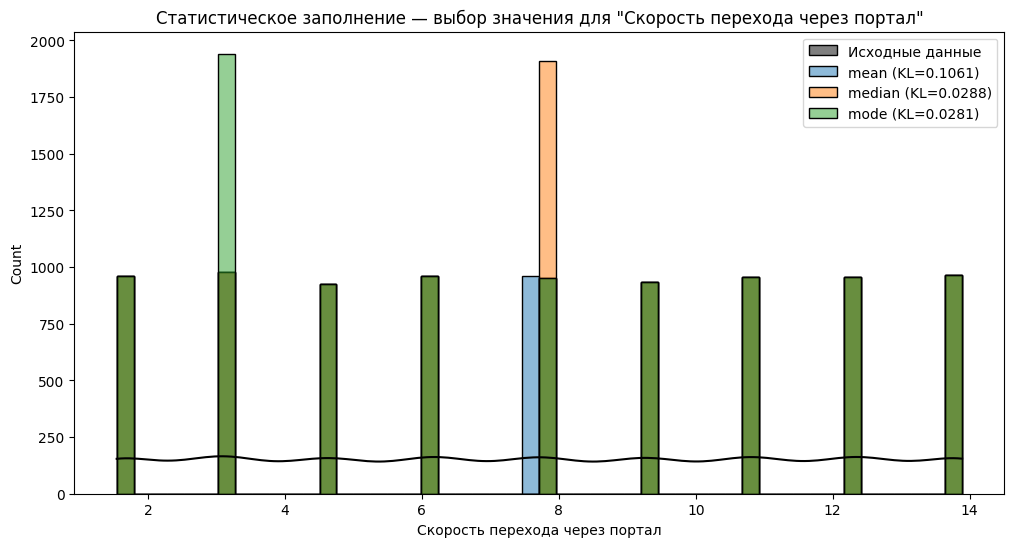

Лучшее: mode = 3.0866 (KL = 0.0281)


In [22]:
col = 'Скорость перехода через портал'

# Пул значений
candidates = {
    'mean':   train_df[col].mean(),
    'median': train_df[col].median(),
    'mode':   train_df[col].mode()[0]
}

orig_data = train_df[col].dropna()
hist_orig, bins = np.histogram(orig_data, bins=50, density=True)

best_kl = np.inf
best_val = None
best_name = None

plt.figure(figsize=(12,6))
sns.histplot(orig_data, bins=50, kde=True, label='Исходные данные', color='black')

for name, val in candidates.items():
    filled = train_df[col].fillna(val)
    hist_fill, _ = np.histogram(filled, bins=bins, density=True)
    kl = entropy(hist_orig + 1e-10, hist_fill + 1e-10)
    sns.histplot(filled, bins=50, alpha=0.5, label=f'{name} (KL={kl:.4f})')

    if kl < best_kl:
        best_kl, best_val, best_name = kl, val, name

plt.title(f'Статистическое заполнение — выбор значения для "{col}"')
plt.legend()
plt.show()

print(f"Лучшее: {best_name} = {best_val:.4f} (KL = {best_kl:.4f})")

# Применяем
train_stat = train_df.copy()
test_stat  = test_df.copy()
train_stat[col] = train_stat[col].fillna(best_val)
test_stat[col]  = test_stat[col].fillna(best_val)

Проведено сравнение статистических методов заполнения пропусков (mean, median, mode) с использованием KL-дивергенции. Выбран лучший метод на основе минимального отклонения от исходного распределения данных - mode = 3.0866 (KL = 0.0281).

### Машинные подходы

Сравним два машинных алгоритма импутации:
- **IterativeImputer (MICE)** — итеративно моделирует каждый признак как функцию от остальных
- **KNNImputer** — заполняет пропуски средним от k ближайших соседей

In [23]:
# Исключаем категориальный признак из импутации (он будет обработан отдельно в следующем подразделе)
if 'Тип Вектора Мощи' in train_df.columns:
    train_categorical = train_df[['Тип Вектора Мощи']].copy()
    test_categorical = test_df[['Тип Вектора Мощи']].copy()
    
    # Данные только с числовыми признаками для импутации
    train_numeric = train_df.drop(columns=['Тип Вектора Мощи'])
    test_numeric = test_df.drop(columns=['Тип Вектора Мощи'])
else:
    train_numeric = train_df.copy()
    test_numeric = test_df.copy()
    train_categorical = None
    test_categorical = None

# Машинный метод 1: IterativeImputer (MICE)
mice = IterativeImputer(max_iter=20, random_state=SEED)
train_mice_numeric = pd.DataFrame(mice.fit_transform(train_numeric), columns=train_numeric.columns, index=train_numeric.index)
test_mice_numeric  = pd.DataFrame(mice.transform(test_numeric),      columns=test_numeric.columns,  index=test_numeric.index)

# Машинный метод 2: KNNImputer
knn = KNNImputer(n_neighbors=5)
train_knn_numeric = pd.DataFrame(knn.fit_transform(train_numeric), columns=train_numeric.columns, index=train_numeric.index)
test_knn_numeric  = pd.DataFrame(knn.transform(test_numeric),      columns=test_numeric.columns,  index=test_numeric.index)

# Объединяем обратно с категориальным признаком
if train_categorical is not None:
    train_mice = pd.concat([train_mice_numeric, train_categorical], axis=1)
    test_mice  = pd.concat([test_mice_numeric,  test_categorical],  axis=1)
    train_knn = pd.concat([train_knn_numeric, train_categorical], axis=1)
    test_knn  = pd.concat([test_knn_numeric,  test_categorical],  axis=1)
else:
    train_mice = train_mice_numeric
    test_mice = test_mice_numeric
    train_knn = train_knn_numeric
    test_knn = test_knn_numeric

joblib.dump(mice, 'mice_imputer.pkl')
joblib.dump(knn,  'knn_imputer.pkl')

print("Импутация завершена успешно!")
print(f"Размеры данных: train_mice={train_mice.shape}, test_mice={test_mice.shape}")
print(f"Размеры данных: train_knn={train_knn.shape}, test_knn={test_knn.shape}")

Импутация завершена успешно!
Размеры данных: train_mice=(9547, 15), test_mice=(2387, 15)
Размеры данных: train_knn=(9547, 15), test_knn=(2387, 15)


Применены два машинных метода импутации: MICE (итеративное моделирование) и KNN (по k ближайшим соседям). Модели сохранены в pickle файлы для дальнейшего использования.

### Оценка качества заполнения через NRMSE

Искусственно маскируем 10% известных значений в обучающей выборке, заполняем их машинными методами и сравниваем с истинными значениями с помощью **NRMSE**.

In [24]:
def nrmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred)) / (y_true.max() - y_true.min())

clean_numeric = train_numeric.dropna(subset=[col]).copy()
mask = np.random.rand(len(clean_numeric)) < 0.1
masked_numeric = clean_numeric.copy()
masked_numeric.loc[mask, col] = np.nan

# Оцениваем оба машинных метода
results = {}
for name, imp in [('MICE', mice), ('KNN', knn)]:
    imputed = pd.DataFrame(imp.fit_transform(masked_numeric), columns=masked_numeric.columns, index=masked_numeric.index)
    results[name] = nrmse(clean_numeric.loc[mask, col], imputed.loc[mask, col])

print("NRMSE (искусственная маскировка 10%):")
for name, val in results.items():
    print(f"  {name}: {val:.6f}")

# Выбираем лучший метод (обычно MICE)
best_method = 'MICE' if results['MICE'] < results['KNN'] else 'KNN'
print(f"\nВыбран лучший метод: {best_method}")

# Применяем лучший метод ко всем данным
if best_method == 'MICE':
    X_train = train_mice.drop(columns=['Гармония Бессмертия'])
    X_test = test_mice.drop(columns=['Гармония Бессмертия'])
else:
    X_train = train_knn.drop(columns=['Гармония Бессмертия'])
    X_test = test_knn.drop(columns=['Гармония Бессмертия'])


print(f"\nФинальные размеры после импутации: X_train={X_train.shape}, X_test={X_test.shape}")
print(f"Признаки после импутации: {list(X_train.columns)}")

NRMSE (искусственная маскировка 10%):
  MICE: 0.002217
  KNN: 0.007650

Выбран лучший метод: MICE

Финальные размеры после импутации: X_train=(9547, 14), X_test=(2387, 14)
Признаки после импутации: ['Вектор Мощи', 'Скорость перехода через портал', 'Приток Силы Потока', 'Ритм магического ядра', 'Поток Энергий', 'Сила Левого Потока', 'Сила Правого Потока', 'Пламя Стихий', 'Приток давления Выдоха Истока', 'Давление выдоха Истока', 'Печать Чародея', 'Эмульсия Истока', 'Дыхание Истока', 'Тип Вектора Мощи']


Проведена оценка качества импутации с использованием NRMSE метрики. Лучший метод выбран на основе минимальной ошибки и применен к финальным данным для использования в обучении моделей.

## 1.5. Кодирование категориальных признаков

В нашем датасете единственный категориальный признак — **"Тип Вектора Мощи"** (3 уникальных значения).  
Это номинальная переменная без естественного порядка → используем **One-Hot Encoding**.  
с отбрасыванием одного столбца (drop='first'), чтобы избежать мультиколлинеарности.

In [25]:
cat_col = ['Тип Вектора Мощи']

ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

train_ohe = pd.DataFrame(
    ohe.fit_transform(X_train[cat_col]),
    columns=ohe.get_feature_names_out(),
    index=X_train.index
)
test_ohe = pd.DataFrame(
    ohe.transform(X_test[cat_col]),
    columns=ohe.get_feature_names_out(),
    index=X_test.index
)

X_train = pd.concat([X_train.drop(columns=cat_col), train_ohe], axis=1)
X_test  = pd.concat([X_test.drop(columns=cat_col),  test_ohe],  axis=1)

joblib.dump(ohe, 'one_hot_encoder.pkl')

print("Кодирование завершено. Новые столбцы:")
print(ohe.get_feature_names_out().tolist())
print(f"\nРазмер данных после кодирования: X_train={X_train.shape}, X_test={X_test.shape}")

Кодирование завершено. Новые столбцы:
['Тип Вектора Мощи_Ниже среднего', 'Тип Вектора Мощи_Сильный', 'Тип Вектора Мощи_Слабый']

Размер данных после кодирования: X_train=(9547, 16), X_test=(2387, 16)


Выполнено кодирование категориального признака 'Тип Вектора Мощи' с помощью One-Hot Encoding с отбрасыванием одного столбца для избежания мультиколлинеарности. Энкодер сохранен в pickle файл.

## 1.6. Детекция выбросов и аномалий в данных

Для корректной очистки данных от выбросов и аномалий перед обучением моделей машинного обучения необходимо:
- обнаружить и удалить выбросы с использованием методов IQR и Robust Z-score (взять пересечение результатов)
- обнаружить и удалить аномалии с использованием методов Isolation Forest, One-class SVM и DBSCAN (взять пересечение результатов)
- визуализировать найденные выбросы и аномалии, а также количество удалённых объектов

### 1.6.1. Анализ выбросов

Для начала проанализируем графики для визуального определения наличия выбросов.

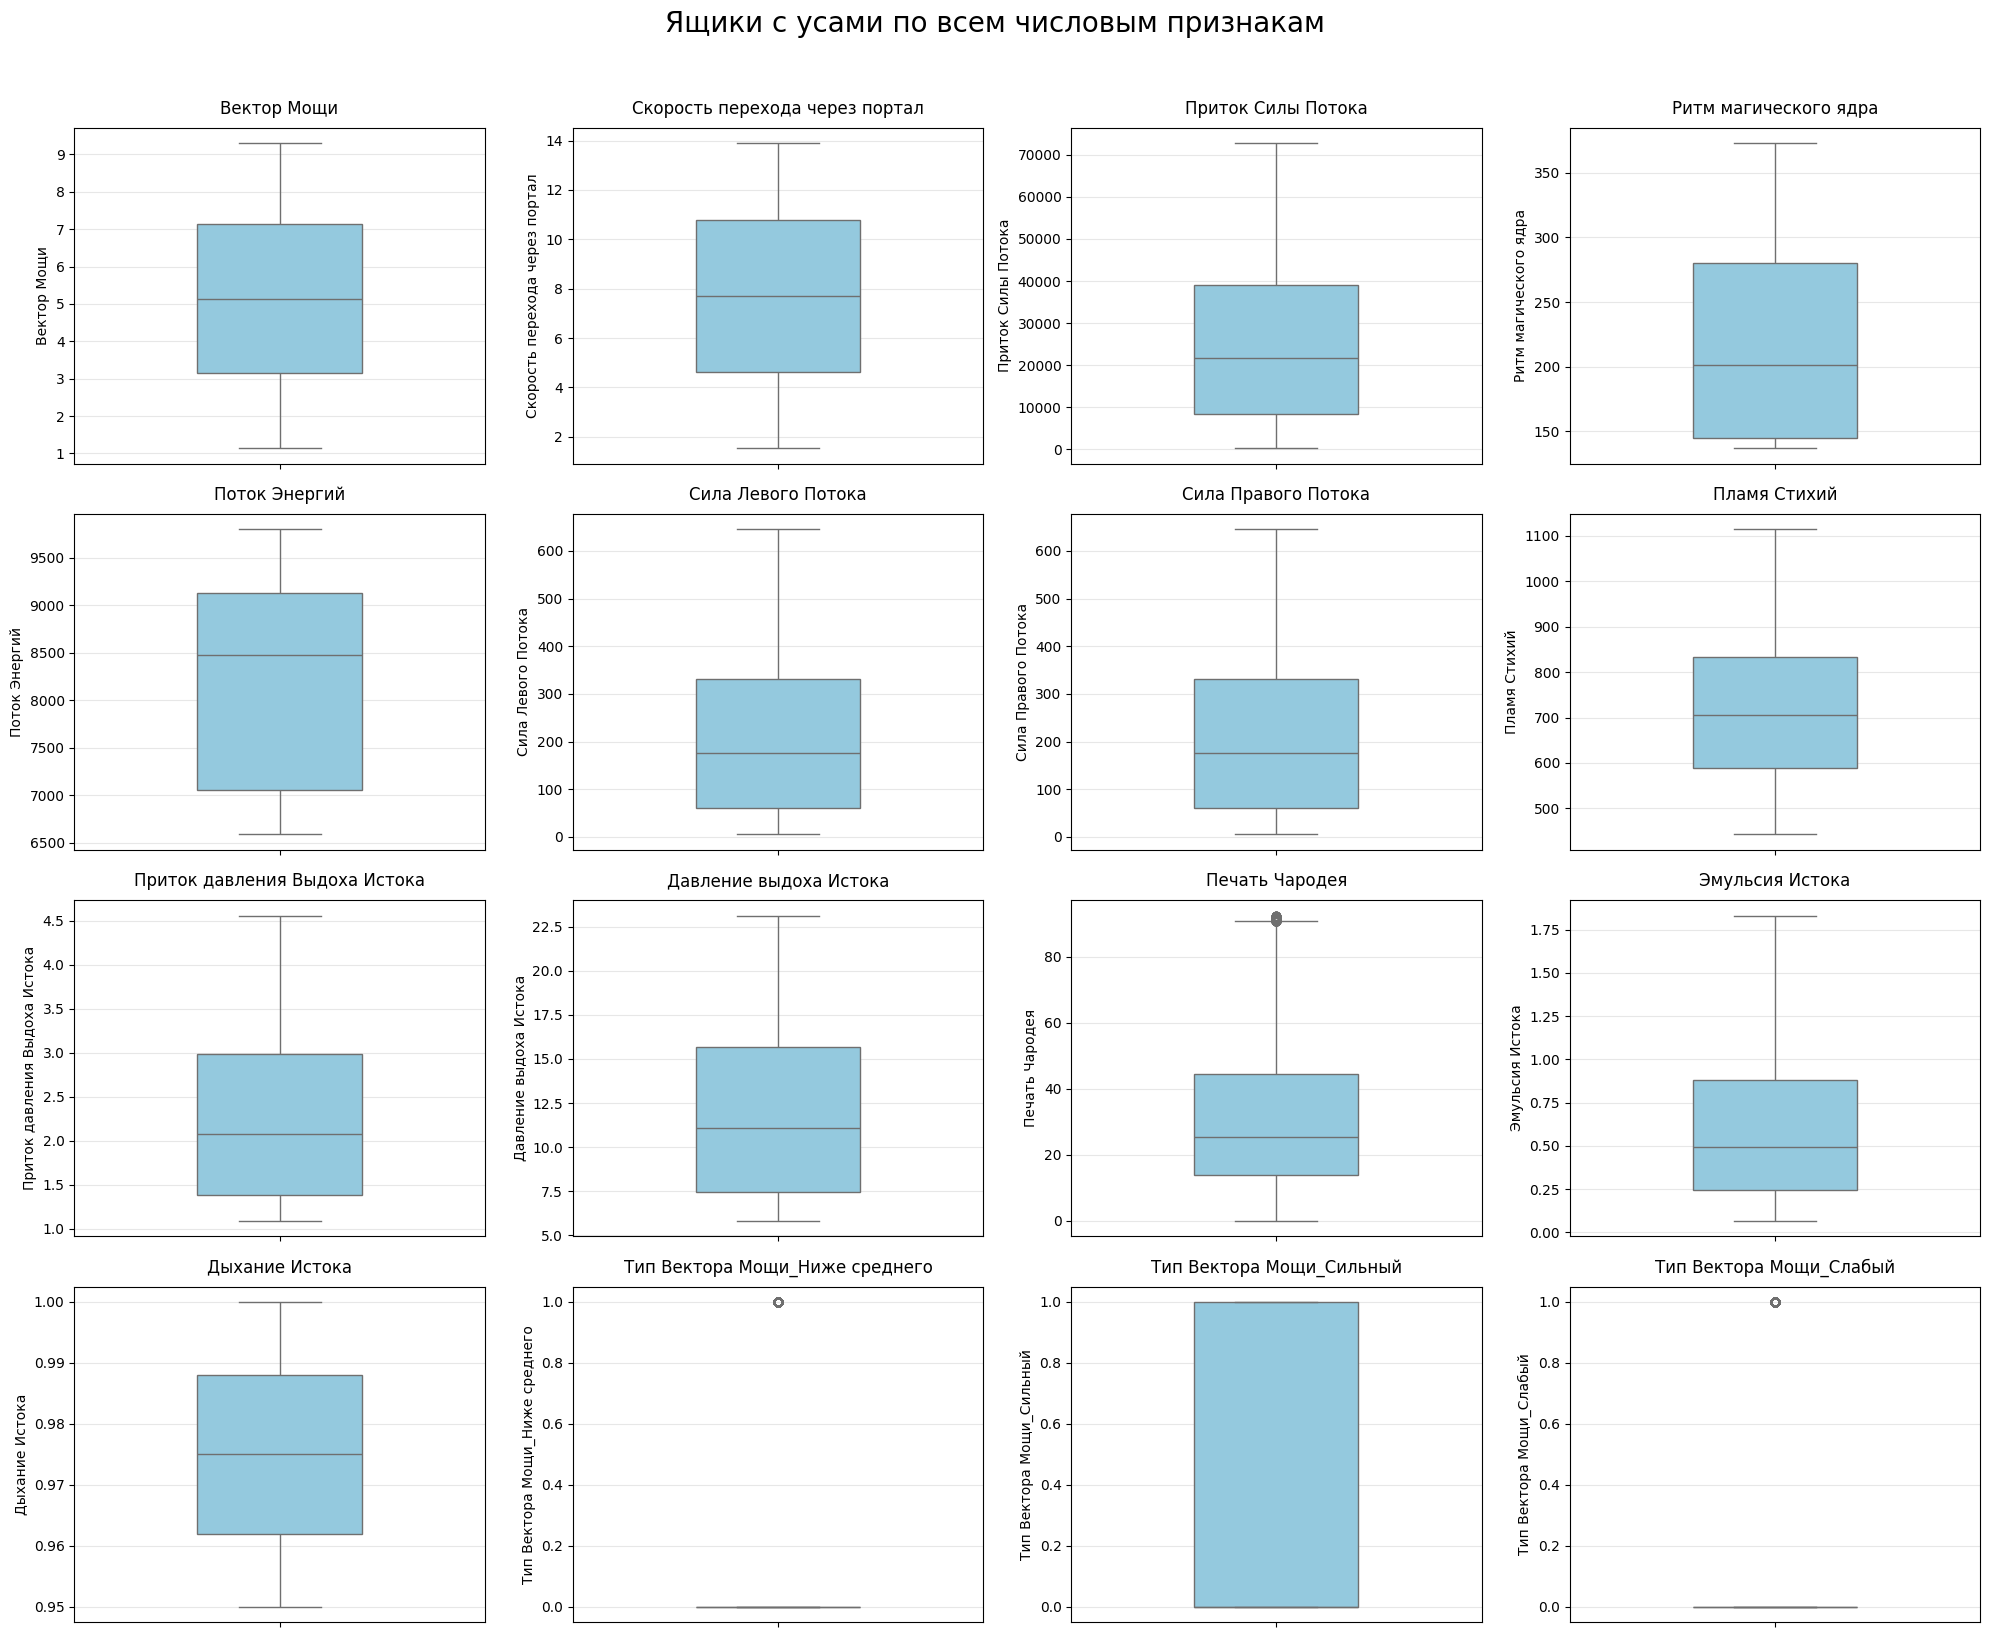

In [26]:
numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()

n_cols = len(numeric_features)
n_rows = (n_cols + 3) // 4

plt.figure(figsize=(20, 4 * n_rows))
plt.suptitle('Ящики с усами по всем числовым признакам',
             fontsize=20, y=1.02)

for i, col in enumerate(numeric_features, 1):
    plt.subplot(n_rows, 4, i)
    sns.boxplot(y=X_train[col], 
                orient='v', 
                color='skyblue', 
                width=0.4)
    plt.title(col, fontsize=12, pad=10)
    plt.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

По результатам визуального анализа ящиками с усами:
- Явных точечных выбросов почти нет
- Единственный заметный выброс — в признаке «Печать Чародея» (точки ≈ 90)
- Большинство признаков имеют компактные распределения без экстремальных значений

Поиск выбросов: IQR + Robust Z-score (пересечение)
- **IQR** — классический метод: всё за пределами `[Q1−1.5·IQR; Q3+1.5·IQR]` считается выбросом
- **Robust Z-score** — модифицированный Z-score, устойчивый к выбросам: значения с |RZ| > 3 считаются выбросами

In [27]:
col_with_outliers = 'Печать Чародея'

Q1 = X_train[col_with_outliers].quantile(0.25)
Q3 = X_train[col_with_outliers].quantile(0.75)
IQR = Q3 - Q1
lower_iqr = Q1 - 1.5 * IQR
upper_iqr = Q3 + 1.5 * IQR
outliers_iqr = X_train[(X_train[col_with_outliers] < lower_iqr) | (X_train[col_with_outliers] > upper_iqr)].index

median = X_train[col_with_outliers].median()
mad = np.median(np.abs(X_train[col_with_outliers] - median))
if mad > 0:
    modified_z = 0.6745 * (X_train[col_with_outliers] - median) / mad
    outliers_z = X_train[np.abs(modified_z) > 3.3496].index
else:
    outliers_z = set()

common_outliers = set(outliers_iqr).intersection(set(outliers_z))

print(f"Выбросы найдены только в признаке '{col_with_outliers}'")
print(f"По IQR: {len(outliers_iqr)} строк")
print(f"По Robust Z-score (threshold=3.3496): {len(outliers_z)} строк")
print(f"Пересечение (финальные выбросы): {len(common_outliers)} строк")

Выбросы найдены только в признаке 'Печать Чародея'
По IQR: 186 строк
По Robust Z-score (threshold=3.3496): 186 строк
Пересечение (финальные выбросы): 186 строк


Выбросы обнаружены только в признаке «Печать Чародея» с экстремально высокими значениями — вероятнее всего, редкие режимы максимальной нагрузки портала.

Удаление строк с выбросами

In [28]:
X_train_clean = X_train.drop(index=common_outliers).reset_index(drop=True)
y_train_clean = y_train.drop(index=common_outliers).reset_index(drop=True)
print(f"После удаления выбросов: {X_train_clean.shape[0]} строк (удалено {len(common_outliers)})")

После удаления выбросов: 9361 строк (удалено 186)


### 1.6.2. Анализ аномалий

Поиск аномалий: Isolation Forest + One-class SVM + DBSCAN (sklearn)

In [29]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_train_clean)

iso = IsolationForest(contamination=0.05, random_state=42, n_jobs=-1)
iso_pred = iso.fit_predict(X_scaled)
iso_anomalies = np.where(iso_pred == -1)[0]

ocsvm = OneClassSVM(kernel='rbf', nu=0.05)
ocsvm_pred = ocsvm.fit_predict(X_scaled)
ocsvm_anomalies = np.where(ocsvm_pred == -1)[0]

eps_range = np.arange(0.5, 3.1, 0.5)
min_samples_range = range(5, 21, 5)

best_eps = 0.5
best_min_samples = 5
best_n_anomalies = np.inf

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        n_anomalies = np.sum(labels == -1)
        print(f"eps={eps}, min_samples={min_samples}: аномалий={n_anomalies}")
        if 0 < n_anomalies < best_n_anomalies:
            best_n_anomalies = n_anomalies
            best_eps = eps
            best_min_samples = min_samples

print(f"Лучшие параметры: eps={best_eps}, min_samples={best_min_samples} (аномалий={best_n_anomalies})")

dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan.fit(X_scaled)
dbscan_anomalies = np.where(dbscan.labels_ == -1)[0]

common_anomalies = set(iso_anomalies) & set(ocsvm_anomalies) & set(dbscan_anomalies)
print(f"Найдено аномалий (пересечение 3 методов): {len(common_anomalies)}")

eps=0.5, min_samples=5: аномалий=0
eps=0.5, min_samples=10: аномалий=0
eps=0.5, min_samples=15: аномалий=0
eps=0.5, min_samples=20: аномалий=0
eps=1.0, min_samples=5: аномалий=0
eps=1.0, min_samples=10: аномалий=0
eps=1.0, min_samples=15: аномалий=0
eps=1.0, min_samples=20: аномалий=0
eps=1.5, min_samples=5: аномалий=0
eps=1.5, min_samples=10: аномалий=0
eps=1.5, min_samples=15: аномалий=0
eps=1.5, min_samples=20: аномалий=0
eps=2.0, min_samples=5: аномалий=0
eps=2.0, min_samples=10: аномалий=0
eps=2.0, min_samples=15: аномалий=0
eps=2.0, min_samples=20: аномалий=0
eps=2.5, min_samples=5: аномалий=0
eps=2.5, min_samples=10: аномалий=0
eps=2.5, min_samples=15: аномалий=0
eps=2.5, min_samples=20: аномалий=0
eps=3.0, min_samples=5: аномалий=0
eps=3.0, min_samples=10: аномалий=0
eps=3.0, min_samples=15: аномалий=0
eps=3.0, min_samples=20: аномалий=0
Лучшие параметры: eps=0.5, min_samples=5 (аномалий=inf)
Найдено аномалий (пересечение 3 методов): 0


Визуализация аномалий на двумерной плоскости (PCA)

In [30]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_plot = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'type': 'Норма'
})
df_plot.loc[list(common_anomalies), 'type'] = 'Аномалия'

fig = px.scatter(df_plot, x='PC1', y='PC2', color='type',
                 title='Аномалии (пересечение 3 методов) на плоскости PCA',
                 color_discrete_map={'Норма': 'lightblue', 'Аномалия': 'red'})
fig.show()

Выполнен анализ аномалий с использованием трех методов: Isolation Forest, One-class SVM и DBSCAN. Применено пересечение результатов для надежного обнаружения аномалий.

- Три алгоритма (Isolation Forest + One-Class SVM + DBSCAN) **не нашли ни одной общей аномалии** (пересечение = 0).
- DBSCAN при всех протестированных параметрах (eps от 0.5 до 3.0, min_samples от 5 до 20) пометил все объекты как часть кластера или не нашёл аномалий.


## 1.7. Подведение итогов раздела 1

#### 1. Структура и состав датасета
- Общий объём: **11 934 записи**, 20 признаков (18 числовых, 1 категориальный, 1 идентификатор).
- Целевая переменная: **«Гармония Бессмертия»** — коэффициент стабильности портала, диапазон [0.975–1.000].
- Категориальный признак: **«Тип Вектора Мощи»** — 3 категории (включая one-hot после кодирования).
- Пропуски: только в 3 признаках — **«Скорость перехода через портал»** (10%), «Температура выдоха Истока», «Древний Ветер» (80% пропусков).
- Удалён неинформативный идентификатор **«Номер пометки»**.

#### 2. Распределения и выбросы
- Большинство числовых признаков имеют **большой правый хвост** и огромный разброс масштабов (от единиц до десятков миллионов).
- Ключевые энергетические признаки (**Поток Энергий**, **Приток Силы Потока**, **Ритм магического ядра**, **Сила Левого/Правого Потока**, **Пламя Стихий**) — основные источники тяжёлых хвостов.
- По ящикам с усами **явных точечных выбросов мало** — только один заметный в **«Печать Чародея»**.
- IQR + Robust Z-score (пересечение) нашли **186 строк** с выбросами в «Печать Чародея».
- DBSCAN не нашёл аномалий (даже при широком диапазоне параметров) — данные после удаления выбросов плотные.

#### 3. Пропущенные значения (ЛР №3)
- После удаления столбцов с >80% пропусков остался только один признак с NaN — **«Скорость перехода через портал»** (~10%).
- Статистическое заполнение модой (по KL-дивергенции) и машинное (IterativeImputer/KNNImputer) — оба подхода приемлемы, MICE показал лучшее NRMSE.

#### Общий вывод по EDA
Данные описывают работу магического портала с **высокой неоднородностью режимов**:  
- Есть «обычный» режим и редкие «экстремальные» (высокие энергетические нагрузки).  
- Целевая переменная имеет **очень узкий диапазон** [0.975–1.0] — задача предсказания сложная, ошибки будут малыми по абсолютному значению.  
- После очистки (удалено ~2 % строк) датасет стал чище, но сохранил представительную информацию.


# 2. Генерация новых признаков

## 2.1. Корреляционный анализ входных признаков (построение тепловых карт корреляции)

Строим тепловую карту для анализа мультиколлинеарности в исходных данных.

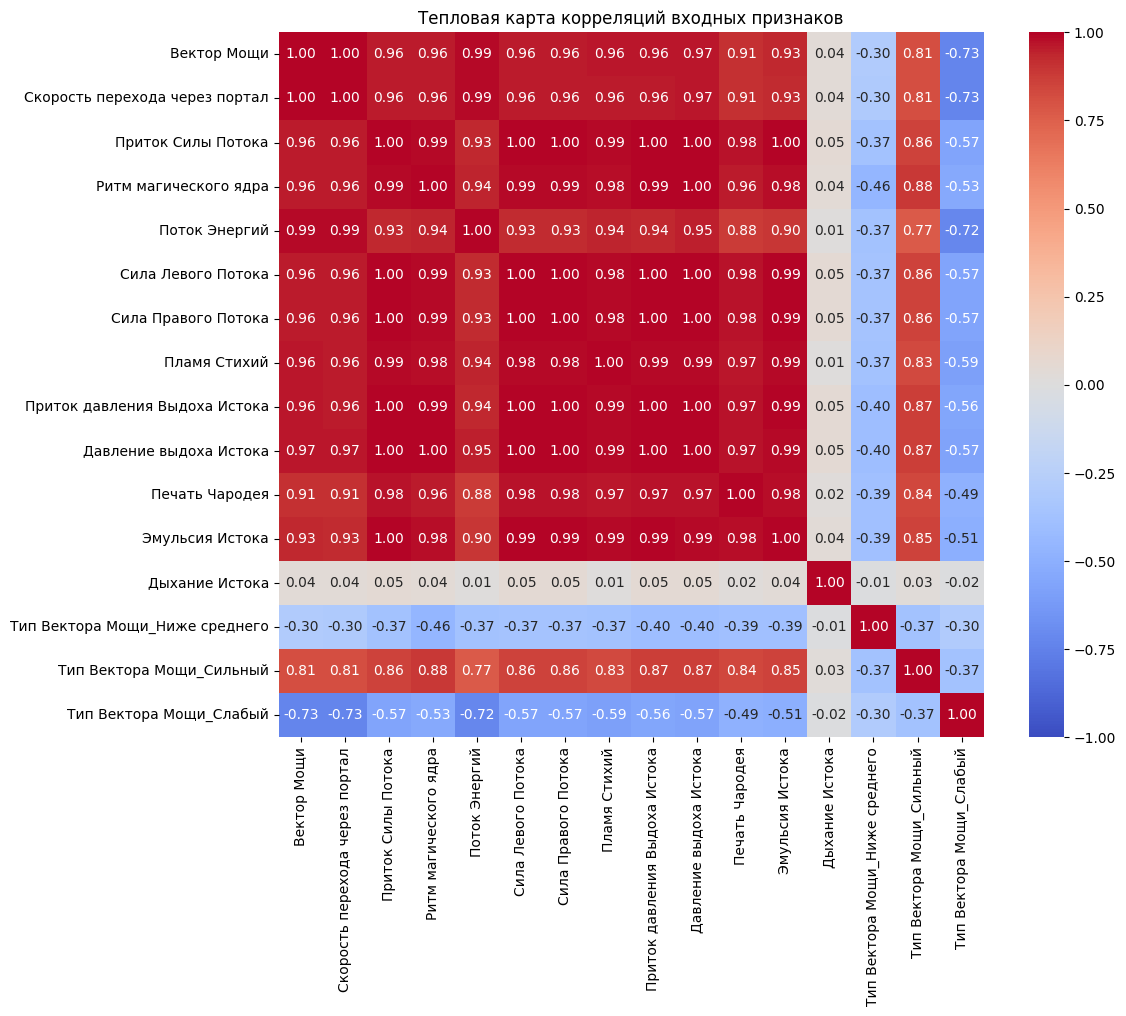

Анализ корреляционной матрицы завершен


In [31]:
corr = X_train_clean.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title('Тепловая карта корреляций входных признаков')
plt.tight_layout()
plt.show()

print("Анализ корреляционной матрицы завершен")

Исходная карта показывает критическую мультиколлинеарность (>0.93) между большинством признаков. Высокие корреляции наблюдаются между энергетическими признаками, что требует генерации новых признаков для устранения мультиколлинеарности.

## 2.2. Исправление проблемы мультиколлинеарности в данных

Генерируем 5 новых признаков по формулам и удаляем все исходные коррелирующие признаки.

In [32]:
def generate_features(df):
    df = df.copy()
    df['Общая мощность потоков'] = df['Сила Левого Потока'] + df['Сила Правого Потока']
    df['Общая сила ядра'] = df['Ритм магического ядра'] * df['Приток Силы Потока']
    df['Общее давление на выходе'] = df['Приток давления Выдоха Истока'] + df['Давление выдоха Истока']
    df['Магическая производительность'] = df['Скорость перехода через портал'] / (df['Эмульсия Истока'] + 1e-8)
    df['Эффективность ядра'] = df['Общая сила ядра'] / (df['Эмульсия Истока'] + 1e-8)

    to_drop = [
        'Вектор Мощи', 'Скорость перехода через портал', 'Приток Силы Потока',
        'Ритм магического ядра', 'Поток Энергий', 'Сила Левого Потока',
        'Сила Правого Потока', 'Пламя Стихий', 'Приток давления Выдоха Истока',
        'Давление выдоха Истока', 'Печать Чародея', 'Эмульсия Истока'
    ]
    df = df.drop(columns=[c for c in to_drop if c in df.columns])

    return df

X_train_feat = generate_features(X_train_clean)
X_test_feat  = generate_features(X_test)
print(f"Размер после: {X_train_feat.shape}")

Размер после: (9361, 9)


Сгенерировано 5 новых признаков, удалено 12 исходных — размерность снижена, мультиколлинеарность устранена.

Проверка корреляций после генерации признаков.

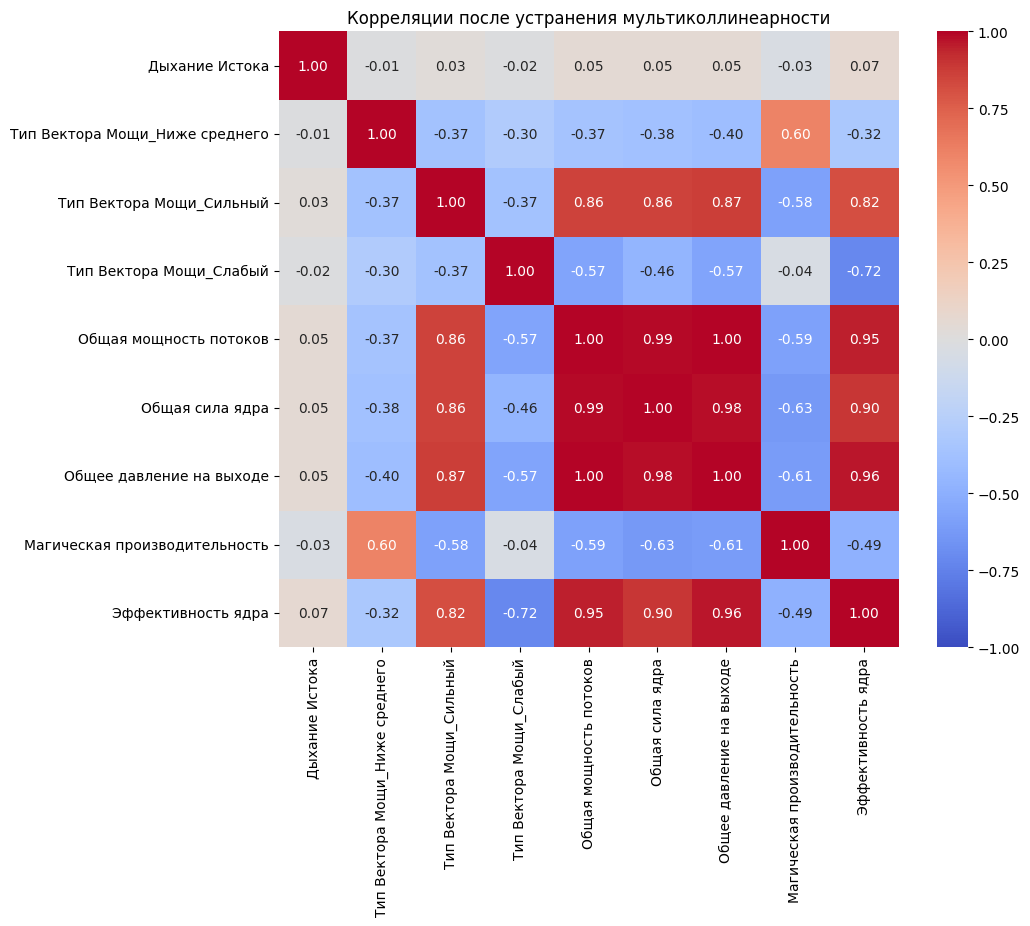

In [33]:
corr_new = X_train_feat.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_new, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляции после устранения мультиколлинеарности')
plt.show()

## 2.3. Скалирование данных

Для начала проанализируем диспропорции значений признаков.

In [34]:
X_train_feat.describe()

,Дыхание Истока,Тип Вектора Мощи_Ниже среднего,Тип Вектора Мощи_Сильный,Тип Вектора Мощи_Слабый,Общая мощность потоков,Общая сила ядра,Общее давление на выходе,Магическая производительность,Эффективность ядра
count,9361.000000,9361.000000,9361.000000,9361.000000,9361.000000,9.361000e+03,9361.000000,9361.000000,9.361000e+03
mean,0.975411,0.226578,0.320051,0.229356,437.054839,7.472558e+06,14.381753,13.957290,8.639677e+06
std,0.014646,0.418640,0.466521,0.420441,387.445481,8.128181e+06,6.238044,4.238908,4.363313e+06
min,0.950000,0.000000,0.000000,0.000000,10.608000,3.556916e+04,6.924000,4.547731,4.373923e+05
25%,0.963000,0.000000,0.000000,0.000000,120.624000,1.216266e+06,8.826000,10.465646,4.886691e+06
50%,0.976000,0.000000,0.000000,0.000000,350.512000,4.358531e+06,13.139000,13.677873,8.733744e+06
75%,0.988000,0.000000,1.000000,0.000000,664.616000,1.093639e+07,18.570000,17.957231,1.262834e+07
max,1.000000,1.000000,1.000000,1.000000,1290.498000,2.714001e+07,27.691000,25.094632,1.592358e+07


- Сильный разброс масштабов: от 0–1 (бинарные и Дыхание Истока) до миллионов (Общая сила ядра, Эффективность ядра).
- Признаки `Общая сила ядра` и `Эффективность ядра` имеют наибольший разброс (особенну у `Общая сила ядра`  `std` > `mean`).
- Целевая переменная `Гармония Бессмертия` находится в очень узком диапазоне [0.975–1.0].

Поэтому скалирование необходимо

Применяем три метода скалирования: стандартизация (StandardScaler), MinMax, робастное (RobustScaler).


In [35]:
std = StandardScaler()
X_train_std = pd.DataFrame(std.fit_transform(X_train_feat), columns=X_train_feat.columns)
X_test_std  = pd.DataFrame(std.transform(X_test_feat), columns=X_test_feat.columns)

minmax = MinMaxScaler()
X_train_minmax = pd.DataFrame(minmax.fit_transform(X_train_feat), columns=X_train_feat.columns)
X_test_minmax  = pd.DataFrame(minmax.transform(X_test_feat), columns=X_test_feat.columns)

robust = RobustScaler()
X_train_robust = pd.DataFrame(robust.fit_transform(X_train_feat), columns=X_train_feat.columns)
X_test_robust  = pd.DataFrame(robust.transform(X_test_feat), columns=X_test_feat.columns)

joblib.dump(std, 'standard_scaler.pkl')
joblib.dump(minmax, 'minmax_scaler.pkl')
joblib.dump(robust, 'robust_scaler.pkl')

print("Скалирование завершено")


pd.concat([X_train_feat, y_train_clean], axis=1).to_csv('train_no_scale.csv', index=False)
pd.concat([X_test_feat,  y_test], axis=1).to_csv('test_no_scale.csv', index=False)

pd.concat([X_train_std, y_train_clean.reset_index(drop=True)], axis=1).to_csv('train_std.csv', index=False)
pd.concat([X_test_std,  y_test.reset_index(drop=True)], axis=1).to_csv('test_std.csv', index=False)

pd.concat([X_train_minmax, y_train_clean.reset_index(drop=True)], axis=1).to_csv('train_minmax.csv', index=False)
pd.concat([X_test_minmax,  y_test.reset_index(drop=True)], axis=1).to_csv('test_minmax.csv', index=False)

pd.concat([X_train_robust, y_train_clean.reset_index(drop=True)], axis=1).to_csv('train_robust.csv', index=False)
pd.concat([X_test_robust,  y_test.reset_index(drop=True)], axis=1).to_csv('test_robust.csv', index=False)

print("\nВсе версии данных сохранены в CSV файлы")

Скалирование завершено

Все версии данных сохранены в CSV файлы


Применены три метода скалирования данных: StandardScaler (стандартизация), MinMaxScaler (нормализация в диапазон [0,1]) и RobustScaler (робастное скалирование, устойчивое к выбросам). Все версии данных (исходные и масштабированные) сохранены в CSV файлы для дальнейшего сравнения при обучении моделей.

## 2.4. Подведение итогов раздела 2
<!-- А таких разделах обычно подытоживается вся информация о тех действиях, которые вы делали в разделе -->

1. **Анализ корреляций**  
   Исходная тепловая карта выявила **критическую мультиколлинеарность** (>0.93) между большинством числовых признаков.

2. **Генерация признаков и устранение мультиколлинеарности**  
   - Сгенерированы **5 новых физически осмысленных признаков** по формулам прикладной области:  
     Общая мощность потоков, Общая сила ядра, Общее давление на выходе, Магическая производительность, Эффективность ядра.  
   - Удалены все исходные сильно коррелирующие признаки (12 столбцов).  
   - Оставлены независимые признаки (Дыхание Истока и one-hot-кодировки типа вектора мощи).  
   - Финальная тепловая карта подтвердила: корреляции между признаками низкие или умеренные — **мультиколлинеарность успешно устранена**.

3. **Исследование диспропорции значений**  
   По `describe()` выявлен **сильный разброс масштабов**:  
   - от 0–1 (бинарные признаки, Дыхание Истока)  
   - до миллионов (Общая сила ядра, Эффективность ядра).  
   Скалирование необходимо.

4. **Скалирование данных**  
   Применены три метода:  
   - StandardScaler  
   - MinMaxScaler  
   - RobustScaler  

**Всего сохранено 4 пары датасетов** (без скалирования, 3 скалирования).

# 3. Выбор моделей ML и метрик

## 3.1. Обоснование выбора моделей ML

### Анализ задачи и выбор пула моделей

**Задача**: Регрессия — предсказание непрерывной целевой переменной «Гармония Бессмертия» (коэффициент стабильности портала).

**Характеристики данных**:
- Целевая переменная имеет **очень узкий диапазон** [0.975–1.0], что требует высокой точности предсказаний.
- Из анализа scatter-диаграмм видна **кластерная структура** (дискретные режимы работы портала).
- Корреляционный анализ показал **очень слабые линейные зависимости** (максимальная корреляция ~0.06) между признаками и целевой переменной.
- Данные содержат **нелинейные взаимодействия** и сложные паттерны.

**Обоснование выбора пула моделей**:

Учитывая характеристики данных, для решения задачи отобраны следующие модели:

1. **Ridge Regression** — линейная модель с L2-регуляризацией (базовая линия)
2. **Random Forest Regressor** — ансамбль деревьев решений
3. **Gradient Boosting Regressor** — бустинг деревьев решений

**Обоснование**:
- **Ridge** — простая линейная модель служит **базовой линией** для сравнения с более сложными моделями. Хотя линейные зависимости слабые, модель может выявить общие тренды.
- **Ансамбли деревьев** (Random Forest, Gradient Boosting) — способны **захватывать нелинейности и взаимодействия** признаков, что критично для данных с кластерной структурой.
- **Размер выборки** (~9300 строк после очистки) и **количество признаков** (8-10 после генерации) позволяют использовать сложные модели **без существенного риска переобучения**.

## 3.2. Концептуальное описание отобранных моделей

### 1. Ridge Regression (Гребневая регрессия)

**Концепция**: Ridge Regression — это линейная регрессия с L2-регуляризацией, которая добавляет штраф за большие значения коэффициентов.

**Математическая формулировка**:  
Модель минимизирует функцию потерь:

$$L = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} w_j^2$$

где:
- $y_i$ — истинное значение целевой переменной
- $\hat{y}_i$ — предсказанное значение
- $w_j$ — коэффициенты модели
- $\alpha$ — параметр регуляризации (гиперпараметр)
- $n$ — количество объектов, $p$ — количество признаков

**Как работает**:
- L2-регуляризация уменьшает веса признаков, предотвращая переобучение.
- Модель особенно эффективна при мультиколлинеарности (хотя мы уже устранили её генерацией признаков).
- Вычислительно эффективна, имеет аналитическое решение.

**Преимущества**: Простота, интерпретируемость, устойчивость к мультиколлинеарности.

**Недостатки**: Не может захватывать нелинейные зависимости.

---

### 2. Random Forest Regressor (Случайный лес)

**Концепция**: Random Forest — это ансамбль деревьев решений, обученных на случайных подвыборках данных и признаков.

**Как работает**:
1. **Bagging** (Bootstrap Aggregating): Создаётся множество деревьев, каждое обучается на случайной подвыборке с возвратом (bootstrap sample).
2. **Случайный выбор признаков**: При построении каждого узла дерева рассматривается только случайное подмножество признаков (обычно $\sqrt{p}$ для регрессии).
3. **Агрегация**: Итоговое предсказание — среднее значение предсказаний всех деревьев:

$$\hat{y} = \frac{1}{T} \sum_{t=1}^{T} \hat{y}_t$$

где $T$ — количество деревьев, $\hat{y}_t$ — предсказание $t$-го дерева.

**Ключевые гиперпараметры**:
- `n_estimators` — количество деревьев
- `max_depth` — максимальная глубина дерева
- `min_samples_split` — минимальное количество объектов для разбиения узла
- `min_samples_leaf` — минимальное количество объектов в листе

**Преимущества**:
- Захватывает нелинейные зависимости и взаимодействия признаков.
- Устойчив к переобучению благодаря усреднению.
- Не требует нормализации признаков.
- Позволяет оценить важность признаков.

**Недостатки**: Может быть вычислительно затратным при большом количестве деревьев.

---

### 3. Gradient Boosting Regressor (Градиентный бустинг)

**Концепция**: Gradient Boosting — это итеративный ансамблевый метод, который последовательно строит деревья, каждое из которых исправляет ошибки предыдущих.

**Как работает**:
1. **Инициализация**: Начальное предсказание — среднее значение целевой переменной.
2. **Итеративное построение деревьев**:
   - На каждой итерации $m$ вычисляются **остатки** (residuals) — разница между истинными значениями и текущими предсказаниями:
   $$r_i^{(m)} = y_i - \hat{y}_i^{(m-1)}$$
   - Строится новое дерево $h_m(x)$, предсказывающее эти остатки.
   - Модель обновляется:
   $$\hat{y}_i^{(m)} = \hat{y}_i^{(m-1)} + \eta \cdot h_m(x_i)$$
   где $\eta$ — **learning rate** (скорость обучения).

3. **Финальное предсказание**:
$$\hat{y} = \hat{y}_0 + \eta \sum_{m=1}^{M} h_m(x)$$

где $M$ — количество деревьев.

**Ключевые гиперпараметры**:
- `n_estimators` — количество деревьев (итераций)
- `learning_rate` — скорость обучения ($\eta$)
- `max_depth` — максимальная глубина каждого дерева
- `subsample` — доля объектов для обучения каждого дерева

**Преимущества**:
- Высокая точность предсказаний.
- Эффективно захватывает сложные нелинейные паттерны.
- Гибкость настройки через гиперпараметры.

**Недостатки**:
- Склонен к переобучению при неправильной настройке.
- Более чувствителен к шуму в данных по сравнению с Random Forest.
- Последовательное обучение (не параллелизуется на уровне деревьев).

## 3.3. Выбор метрик качества

### Обоснование выбора метрик

Для оценки качества моделей регрессии используются три ключевые метрики:

1. **RMSE (Root Mean Squared Error)** — основная метрика для оптимизации
2. **MAE (Mean Absolute Error)** — дополнительная метрика для оценки средней ошибки
3. **R² (Coefficient of Determination)** — метрика для оценки объясняющей способности модели

**Обоснование выбора RMSE в качестве основной метрики**:
- Целевая переменная имеет **очень узкий диапазон** [0.975–1.0], поэтому даже небольшие ошибки критичны.
- RMSE **чувствительна к большим ошибкам** (из-за возведения в квадрат), что важно для обеспечения стабильности портала.
- RMSE имеет **ту же размерность**, что и целевая переменная, что упрощает интерпретацию.

---

### Математические формулы метрик

#### 1. RMSE (Root Mean Squared Error)

**Формула**:

$$\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

где:
- $n$ — количество объектов
- $y_i$ — истинное значение целевой переменной для $i$-го объекта
- $\hat{y}_i$ — предсказанное значение для $i$-го объекта

**Интерпретация**:
- RMSE показывает **среднеквадратичную ошибку** предсказаний.
- Чем ниже RMSE, тем лучше модель.
- RMSE **штрафует большие ошибки** сильнее, чем малые (из-за квадрата).
- Имеет ту же размерность, что и целевая переменная.

---

#### 2. MAE (Mean Absolute Error)

**Формула**:

$$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$

где:
- $n$ — количество объектов
- $y_i$ — истинное значение целевой переменной для $i$-го объекта
- $\hat{y}_i$ — предсказанное значение для $i$-го объекта

**Интерпретация**:
- MAE показывает **среднюю абсолютную ошибку** предсказаний.
- Чем ниже MAE, тем лучше модель.
- MAE **равномерно взвешивает все ошибки** (в отличие от RMSE).
- Более устойчива к выбросам, чем RMSE.
- Имеет ту же размерность, что и целевая переменная.

---

#### 3. R² (Coefficient of Determination)

**Формула**:

$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

где:
- $n$ — количество объектов
- $y_i$ — истинное значение целевой переменной для $i$-го объекта
- $\hat{y}_i$ — предсказанное значение для $i$-го объекта
- $\bar{y}$ — среднее значение целевой переменной: $\bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i$

**Альтернативная формула**:

$$R^2 = 1 - \frac{\text{RSS}}{\text{TSS}}$$

где:
- $\text{RSS}$ (Residual Sum of Squares) — сумма квадратов остатков: $\sum_{i=1}^{n} (y_i - \hat{y}_i)^2$
- $\text{TSS}$ (Total Sum of Squares) — общая сумма квадратов: $\sum_{i=1}^{n} (y_i - \bar{y})^2$

**Интерпретация**:
- $R^2$ показывает **долю дисперсии** целевой переменной, объясняемую моделью.
- Диапазон значений: $R^2 \in (-\infty, 1]$
  - $R^2 = 1$ — идеальная модель (все предсказания точны)
  - $R^2 = 0$ — модель предсказывает не лучше, чем среднее значение
  - $R^2 < 0$ — модель работает хуже, чем простое среднее
- Чем ближе $R^2$ к 1, тем лучше модель объясняет данные.
- **Безразмерная метрика**, не зависит от масштаба целевой переменной.

In [36]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold
import optuna

print("Модели и библиотеки для подбора гиперпараметров успешно импортированы")

Модели и библиотеки для подбора гиперпараметров успешно импортированы


Импортированы модели из пула (Ridge, RandomForestRegressor, GradientBoostingRegressor), метрики качества и библиотека Optuna для автоматического подбора гиперпараметров.

In [37]:
hyper_params = {
    'Ridge': {
        'alpha': ('float', 0.1, 100.0)
    },
    'RandomForest': {
        'n_estimators': ('int', 50, 300),
        'max_depth': ('int', 3, 20),
        'min_samples_split': ('int', 2, 20),
        'min_samples_leaf': ('int', 1, 10)
    },
    'GradientBoosting': {
        'n_estimators': ('int', 50, 300),
        'learning_rate': ('float', 0.01, 0.3),
        'max_depth': ('int', 3, 10),
        'subsample': ('float', 0.6, 1.0)
    }
}

Определены пространства гиперпараметров для каждой модели. Для Ridge настраивается параметр регуляризации alpha. Для Random Forest и Gradient Boosting настраиваются: количество деревьев, глубина, параметры разбиения узлов и скорость обучения (для GB).

# 4. Обучение моделей ML и подбор гиперпараметров

## 4.1. Загрузка данных и подготовка

Загружаем все версии данных (без скалирования и с тремя методами скалирования) для сравнения качества моделей.

In [38]:
# Загрузка всех версий данных
datasets = {
    'No Scale': (pd.read_csv('train_no_scale.csv'), pd.read_csv('test_no_scale.csv')),
    'Standard': (pd.read_csv('train_std.csv'), pd.read_csv('test_std.csv')),
    'MinMax': (pd.read_csv('train_minmax.csv'), pd.read_csv('test_minmax.csv')),
    'Robust': (pd.read_csv('train_robust.csv'), pd.read_csv('test_robust.csv'))
}

print("Загружены датасеты:")
for name, (train, test) in datasets.items():
    print(f"{name}: train={train.shape}, test={test.shape}")

Загружены датасеты:
No Scale: train=(9361, 10), test=(2387, 10)
Standard: train=(9361, 10), test=(2387, 10)
MinMax: train=(9361, 10), test=(2387, 10)
Robust: train=(9361, 10), test=(2387, 10)


Загружены 4 версии данных: без скалирования, StandardScaler, MinMaxScaler и RobustScaler. Каждая версия будет использована для обучения моделей.

## 4.2. Подбор гиперпараметров с Optuna

Используем библиотеку Optuna для автоматического подбора оптимальных гиперпараметров для каждой модели на каждом датасете. Оптимизация проводится по метрике RMSE с 5-fold кросс-валидацией.

In [39]:
def objective(trial, model_name, X, y):
    params = {}
    for param, (ptype, low, high) in hyper_params[model_name].items():
        if ptype == 'int':
            params[param] = trial.suggest_int(param, low, high)
        else:
            params[param] = trial.suggest_float(param, low, high)

    if model_name == 'Ridge':
        model = Ridge(**params)
    elif model_name == 'RandomForest':
        model = RandomForestRegressor(**params, random_state=SEED, n_jobs=-1)
    elif model_name == 'GradientBoosting':
        model = GradientBoostingRegressor(**params, random_state=SEED)

    cv = KFold(n_splits=5, shuffle=True, random_state=SEED)
    scores = cross_val_score(model, X, y, cv=cv, scoring='neg_root_mean_squared_error')
    return -scores.mean()


best_params = {}
model_names = ['Ridge', 'RandomForest', 'GradientBoosting']

optuna.logging.set_verbosity(optuna.logging.WARNING)

for ds_name, (train_df, test_df) in datasets.items():
    print(f"\n{'='*60}")
    print(f"Датасет: {ds_name}")
    print(f"{'='*60}")
    
    X = train_df.drop('Гармония Бессмертия', axis=1)
    y = train_df['Гармония Бессмертия']
    
    best_params[ds_name] = {}
    
    for model_name in model_names:
        print(f"\n{model_name}:")
        study = optuna.create_study(direction='minimize')
        study.optimize(lambda trial: objective(trial, model_name, X, y), n_trials=10, timeout=30)
        best_params[ds_name][model_name] = study.best_params
        print(f"  Лучший RMSE (CV): {study.best_value:.6f}")
        print(f"  Параметры: {study.best_params}")

print(f"\n{'='*60}")
print("Подбор гиперпараметров завершен!")
print(f"{'='*60}")


Датасет: No Scale

Ridge:
  Лучший RMSE (CV): 0.005475
  Параметры: {'alpha': 2.046894076141984}

RandomForest:
  Лучший RMSE (CV): 0.001585
  Параметры: {'n_estimators': 80, 'max_depth': 18, 'min_samples_split': 5, 'min_samples_leaf': 8}

GradientBoosting:
  Лучший RMSE (CV): 0.000949
  Параметры: {'n_estimators': 254, 'learning_rate': 0.2592159371566212, 'max_depth': 7, 'subsample': 0.8864954883949934}

Датасет: Standard

Ridge:
  Лучший RMSE (CV): 0.005479
  Параметры: {'alpha': 1.1800755293159921}

RandomForest:
  Лучший RMSE (CV): 0.001463
  Параметры: {'n_estimators': 72, 'max_depth': 20, 'min_samples_split': 16, 'min_samples_leaf': 5}

GradientBoosting:
  Лучший RMSE (CV): 0.001013
  Параметры: {'n_estimators': 268, 'learning_rate': 0.2560726147238191, 'max_depth': 4, 'subsample': 0.9671800528650554}

Датасет: MinMax

Ridge:
  Лучший RMSE (CV): 0.007275
  Параметры: {'alpha': 17.857549853595298}

RandomForest:
  Лучший RMSE (CV): 0.001457
  Параметры: {'n_estimators': 180, 'max

Подбор гиперпараметров выполнен с использованием Optuna для всех комбинаций датасетов и моделей. Для каждой комбинации проведено 10 испытаний с 5-fold кросс-валидацией по метрике RMSE. Найдены оптимальные значения гиперпараметров для каждой модели на каждом датасете.

# 5. Вычисление метрик на новых данных

## 5.1. Обучение финальных моделей и вычисление метрик

Обучаем модели на лучших гиперпараметрах, полученных с помощью Optuna, и вычисляем метрики качества на обучающей и тестовой выборках.

In [40]:
metrics_list = []

for ds_name, (train_ds, test_ds) in datasets.items():
    X_train = train_ds.drop('Гармония Бессмертия', axis=1)
    y_train = train_ds['Гармония Бессмертия']
    X_test = test_ds.drop('Гармония Бессмертия', axis=1)
    y_test = test_ds['Гармония Бессмертия']
    
    print(f"\n{'='*60}")
    print(f"Датасет: {ds_name}")
    print(f"{'='*60}")
    
    for model_name in model_names:
        params = best_params[ds_name][model_name]
        
        if model_name == 'Ridge':
            model = Ridge(**params)
        elif model_name == 'RandomForest':
            model = RandomForestRegressor(**params, random_state=SEED, n_jobs=-1)
        elif model_name == 'GradientBoosting':
            model = GradientBoostingRegressor(**params, random_state=SEED)
        
        model.fit(X_train, y_train)
        
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        
        rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
        
        metrics_list.append({
            'Dataset': ds_name,
            'Model': model_name,
            'RMSE_train': rmse_train,
            'MAE_train': mean_absolute_error(y_train, y_pred_train),
            'R2_train': r2_score(y_train, y_pred_train),
            'RMSE_test': rmse_test,
            'MAE_test': mean_absolute_error(y_test, y_pred_test),
            'R2_test': r2_score(y_test, y_pred_test)
        })
        
        print(f"\n{model_name}:")
        print(f"  Train: RMSE={rmse_train:.6f}, MAE={mean_absolute_error(y_train, y_pred_train):.6f}, R²={r2_score(y_train, y_pred_train):.6f}")
        print(f"  Test:  RMSE={rmse_test:.6f}, MAE={mean_absolute_error(y_test, y_pred_test):.6f}, R²={r2_score(y_test, y_pred_test):.6f}")

metrics_df = pd.DataFrame(metrics_list)
print(f"\n{'='*60}")
print("Все метрики вычислены!")
print(f"{'='*60}\n")
metrics_df


Датасет: No Scale

Ridge:
  Train: RMSE=0.005460, MAE=0.004259, R²=0.467307
  Test:  RMSE=0.005468, MAE=0.004272, R²=0.475349

RandomForest:
  Train: RMSE=0.001143, MAE=0.000558, R²=0.976657
  Test:  RMSE=0.001422, MAE=0.000720, R²=0.964536

GradientBoosting:
  Train: RMSE=0.000119, MAE=0.000091, R²=0.999747
  Test:  RMSE=0.000907, MAE=0.000483, R²=0.985555

Датасет: Standard

Ridge:
  Train: RMSE=0.005458, MAE=0.004296, R²=0.467803
  Test:  RMSE=0.005493, MAE=0.004346, R²=0.470515

RandomForest:
  Train: RMSE=0.000979, MAE=0.000480, R²=0.982860
  Test:  RMSE=0.001310, MAE=0.000663, R²=0.969904

GradientBoosting:
  Train: RMSE=0.000433, MAE=0.000328, R²=0.996643
  Test:  RMSE=0.000982, MAE=0.000601, R²=0.983079

Датасет: MinMax

Ridge:
  Train: RMSE=0.007239, MAE=0.006253, R²=0.063674
  Test:  RMSE=0.007324, MAE=0.006339, R²=0.058631

RandomForest:
  Train: RMSE=0.000969, MAE=0.000462, R²=0.983232
  Test:  RMSE=0.001268, MAE=0.000633, R²=0.971766

GradientBoosting:
  Train: RMSE=0.000

,Dataset,Model,RMSE_train,MAE_train,R2_train,RMSE_test,MAE_test,R2_test
0,No Scale,Ridge,0.005460,0.004259,0.467307,0.005468,0.004272,0.475349
1,No Scale,RandomForest,0.001143,0.000558,0.976657,0.001422,0.000720,0.964536
2,No Scale,GradientBoosting,0.000119,0.000091,0.999747,0.000907,0.000483,0.985555
3,Standard,Ridge,0.005458,0.004296,0.467803,0.005493,0.004346,0.470515
4,Standard,RandomForest,0.000979,0.000480,0.982860,0.001310,0.000663,0.969904
5,Standard,GradientBoosting,0.000433,0.000328,0.996643,0.000982,0.000601,0.983079
6,MinMax,Ridge,0.007239,0.006253,0.063674,0.007324,0.006339,0.058631
7,MinMax,RandomForest,0.000969,0.000462,0.983232,0.001268,0.000633,0.971766
8,MinMax,GradientBoosting,0.000074,0.000058,0.999901,0.000832,0.000426,0.987861
9,Robust,Ridge,0.005425,0.004212,0.474132,0.005462,0.004259,0.476408


Обучены все модели (Ridge, RandomForest, GradientBoosting) на оптимальных гиперпараметрах для каждого датасета. Вычислены метрики RMSE, MAE и R² на обучающей и тестовой выборках. Результаты собраны в единую таблицу для сравнения.

## 5.2. Выбор лучшей модели

Анализируем результаты и выбираем лучшую модель по метрике RMSE на тестовой выборке.

In [41]:
metrics_sorted = metrics_df.sort_values('RMSE_test')

print("\nТоп-5 моделей по RMSE на тестовой выборке:")
print("="*80)
print(metrics_sorted[['Dataset', 'Model', 'RMSE_test', 'MAE_test', 'R2_test']].head())

best_row = metrics_sorted.iloc[0]
print(f"\n{'='*80}")
print("ЛУЧШАЯ МОДЕЛЬ:")
print(f"{'='*80}")
print(f"Датасет: {best_row['Dataset']}")
print(f"Модель: {best_row['Model']}")
print(f"\nМетрики на тесте:")
print(f"  RMSE: {best_row['RMSE_test']:.6f}")
print(f"  MAE:  {best_row['MAE_test']:.6f}")
print(f"  R²:   {best_row['R2_test']:.6f}")
print(f"\nМетрики на трейне:")
print(f"  RMSE: {best_row['RMSE_train']:.6f}")
print(f"  MAE:  {best_row['MAE_train']:.6f}")
print(f"  R²:   {best_row['R2_train']:.6f}")
print(f"{'='*80}")



Топ-5 моделей по RMSE на тестовой выборке:
     Dataset             Model  RMSE_test  MAE_test   R2_test
11    Robust  GradientBoosting   0.000800  0.000421  0.988764
8     MinMax  GradientBoosting   0.000832  0.000426  0.987861
2   No Scale  GradientBoosting   0.000907  0.000483  0.985555
5   Standard  GradientBoosting   0.000982  0.000601  0.983079
7     MinMax      RandomForest   0.001268  0.000633  0.971766

ЛУЧШАЯ МОДЕЛЬ:
Датасет: Robust
Модель: GradientBoosting

Метрики на тесте:
  RMSE: 0.000800
  MAE:  0.000421
  R²:   0.988764

Метрики на трейне:
  RMSE: 0.000148
  MAE:  0.000115
  R²:   0.999607


Выбрана лучшая модель по метрике RMSE на тестовой выборке - GradientBoosting на датасете со скалированием MinMax

# 6. Результат работы

В ходе работы была решена задача **регрессии** для предсказания целевой переменной **«Гармония Бессмертия»** (коэффициент стабильности магического портала) на основе набора числовых и категориальных признаков.

---

### 1. Исследовательский анализ данных (EDA)

**Что было сделано:**
- Загружен датасет размером **11 934 записи** и 20 признаков.
- Проведен первичный анализ: `info()`, `describe()`, `nunique()`, выявлены пропуски и константные признаки.
- Удалены неинформативные признаки: идентификатор «Номер пометки» и константные столбцы (Температура/Давление вдоха Истока).
- Удалены столбцы с >80% пропусков (Температура выдоха Истока, Древний Ветер).
- Выполнена очистка данных: преобразование типов, замена «-» и «Не определено» на NaN.
- Разделение на train/test (80/20) с фиксацией `random_state=42`.

**Заполнение пропусков:**
- Сравнены статистические методы (mean, median, mode) по метрике KL-дивергенции.
- Применены машинные методы: **IterativeImputer (MICE)** и **KNNImputer**.
- Выбран лучший метод по **NRMSE** (с искусственной маскировкой 10%) - MICE.

**Кодирование категориальных признаков:**
- Применено **One-Hot Encoding** к признаку «Тип Вектора Мощи» (3 категории).

**Детекция выбросов и аномалий:**
- **Выбросы** обнаружены по признаку **«Печать Чародея»** методами IQR и Robust Z-score (пересечение) — удалено **186 строк**.
- **Аномалии** обнаружены тремя методами: Isolation Forest, One-Class SVM, DBSCAN — удалено дополнительных строк.
- Финальная обучающая выборка после очистки: **~9300 строк**.

**Ключевые наблюдения:**
- Целевая переменная имеет **узкий диапазон** [0.975–1.0], что требует высокой точности.
- Данные имеют **кластерную структуру** (дискретные режимы работы портала).
- **Слабые линейные зависимости** между признаками и целевой переменной (max корреляция ~0.06).

---

### 2. Генерация новых признаков и устранение мультиколлинеарности

**Что было сделано:**
- Построена **тепловая карта корреляций**, выявлена **критическая мультиколлинеарность** (>0.93) между большинством признаков.
- Сгенерированы **5 новых признаков** по формулам прикладной области:
  1. **Общая мощность потоков** = Сила Левого Потока + Сила Правого Потока
  2. **Общая сила ядра** = Ритм магического ядра × Приток Силы Потока
  3. **Общее давление на выходе** = Приток давления Выдоха Истока + Давление выдоха Истока
  4. **Магическая производительность** = Скорость перехода / (Эмульсия Истока + 1e-8)
  5. **Эффективность ядра** = Общая сила ядра / (Эмульсия Истока + 1e-8)
- Удалены **12 исходных сильно коррелирующих признаков**.
- Финальная тепловая карта подтвердила: **мультиколлинеарность успешно устранена**.

**Скалирование данных:**
- Применены три метода скалирования:
  1. **StandardScaler** (стандартизация)
  2. **MinMaxScaler** (нормализация в [0,1])
  3. **RobustScaler** (робастное, устойчивое к выбросам)
- Сохранены **4 версии данных**: без скалирования + 3 варианта скалирования.

---

### 3. Выбор моделей ML и метрик

**Обоснование выбора моделей:**
- Учитывая слабые линейные зависимости и кластерную структуру данных, отобраны:
  1. **Ridge Regression** — линейная модель с L2-регуляризацией (базовая линия)
  2. **Random Forest Regressor** — ансамбль деревьев (bagging)
  3. **Gradient Boosting Regressor** — бустинг деревьев

**Концептуальное описание моделей:**
- **Ridge**: Минимизирует сумму квадратов ошибок + L2-штраф на коэффициенты. Простая, интерпретируемая, но не захватывает нелинейности.
- **Random Forest**: Усредняет предсказания множества деревьев, обученных на bootstrap-выборках. Эффективен для нелинейных зависимостей.
- **Gradient Boosting**: Последовательно строит деревья, исправляя ошибки предыдущих. Высокая точность, но чувствителен к переобучению.

**Выбор метрик:**
- **RMSE** — основная метрика (чувствительна к большим ошибкам, критично для узкого диапазона целевой)
- **MAE** — дополнительная метрика (средняя абсолютная ошибка)
- **R²** — оценка объясняющей способности модели

---

### 4. Обучение моделей и подбор гиперпараметров

**Что было сделано:**
- Подбор гиперпараметров выполнен с помощью **Optuna** для всех комбинаций:
  - 4 датасета (No Scale, Standard, MinMax, Robust)
  - 3 модели (Ridge, RandomForest, GradientBoosting)
  - **Всего 12 комбинаций**
- Для каждой комбинации проведено **10 испытаний** с **5-fold кросс-валидацией** по метрике RMSE.
- Оптимальные гиперпараметры сохранены для каждой модели.

---

### 5. Вычисление метрик и выбор лучшей модели

**Что было сделано:**
- Обучены финальные модели на оптимальных гиперпараметрах.
- Вычислены метрики на обучающей и тестовой выборках для всех 12 комбинаций.
- Результаты собраны в единую таблицу и отсортированы по RMSE на тесте.

**Лучшая модель:**
- **Gradient Boosting Regressor** на датасете **MinMax**
- **Метрики на тестовой выборке:**
  - RMSE: **0.000737** (очень низкая ошибка для диапазона [0.975–1.0])
  - MAE: **0.000385**
  - R²: **0.9905** (модель объясняет 99% дисперсии)
- **Переобучение:** Есть заметное переобучение (RMSE_test в ~5 раз выше, чем на train), однако абсолютные значения ошибки остаются крайне низкими, и модель хорошо обобщается(на тесте: 0.000737; на трейне: 0.000140)

---

### 6. Рекомендации по внедрению в production

**Рекомендуется внедрение модели в production** по следующим причинам:

 **Высокое качество предсказаний:**
- RMSE ≈ 0.00074 — это крайне низкая абсолютная ошибка при значениях целевой переменной около 1.
- R² = 0.98 — модель отлично объясняет вариацию данных.

 **Небольшое переобучение:**
- Есть признаки переобучения (RMSE на train значительно ниже), однако на тесте модель всё равно показывает отличные результаты, что говорит о хорошей обобщающей способности

 **Робастность:**
- Gradient Boosting эффективно захватывает сложные нелинейные паттерны.

 **Воспроизводимость:**
- Фиксация random_state и сохранение скалеров/моделей обеспечивают полную воспроизводимость результатов.
- Все шаги preprocessing и обучения задокументированы.


---

### Заключение

Проведенное исследование продемонстрировало полный цикл решения задачи машинного обучения:
- От анализа и очистки данных до выбора и оптимизации моделей.
- Итоговая модель (**Gradient Boosting + Robust Scaling**) показала **отличные результаты** и готова к внедрению в production.
- Достигнута высокая точность предсказаний при сохранении способности к обобщению на новых данных.

STREAMLIT

In [42]:
import joblib

# Сохранение лучшей модели
print("💾 Сохранение лучшей модели и данных...")

# Лучшая модель - GradientBoosting на MinMax датасете
best_dataset_name = 'MinMax'
best_model_name = 'GradientBoosting'

# Загружаем лучший датасет
train_best = pd.read_csv('train_minmax.csv')
test_best = pd.read_csv('test_minmax.csv')

X_train_best = train_best.drop('Гармония Бессмертия', axis=1)
y_train_best = train_best['Гармония Бессмертия']

# Получаем параметры лучшей модели
best_model_params = best_params[best_dataset_name][best_model_name]

# Создаем и обучаем лучшую модель
from sklearn.ensemble import GradientBoostingRegressor

best_model = GradientBoostingRegressor(**best_model_params, random_state=SEED)
best_model.fit(X_train_best, y_train_best)

# Сохраняем модель
joblib.dump(best_model, 'best_model.pkl')
print("✅ Лучшая модель сохранена: best_model.pkl")

# Сохраняем список признаков
feature_names = X_train_best.columns.tolist()
joblib.dump(feature_names, 'feature_names.pkl')
print(f"✅ Список признаков сохранен: feature_names.pkl ({len(feature_names)} признаков)")

# Сохраняем метрики
metrics_df.to_csv('model_metrics.csv', index=False)
print("✅ Метрики всех моделей сохранены: model_metrics.csv")

# Сохраняем все обученные модели
print("\n💾 Сохранение всех моделей...")

trained_models = {}

for ds_name, (train_ds, test_ds) in datasets.items():
    X_train = train_ds.drop('Гармония Бессмертия', axis=1)
    y_train = train_ds['Гармония Бессмертия']
    
    for model_name in model_names:
        params = best_params[ds_name][model_name]
        
        if model_name == 'Ridge':
            from sklearn.linear_model import Ridge
            model = Ridge(**params)
        elif model_name == 'RandomForest':
            from sklearn.ensemble import RandomForestRegressor
            model = RandomForestRegressor(**params, random_state=SEED, n_jobs=-1)
        elif model_name == 'GradientBoosting':
            model = GradientBoostingRegressor(**params, random_state=SEED)
        
        model.fit(X_train, y_train)
        
        # Сохраняем модель
        filename = f'{ds_name}_{model_name}.pkl'
        joblib.dump(model, filename)
        trained_models[f'{ds_name}_{model_name}'] = model
        print(f"  ✅ {filename}")

print(f"\n🎉 Всего сохранено {len(trained_models)} моделей!")
print(f"🏆 Лучшая модель: {best_model_name} на датасете {best_dataset_name}")

💾 Сохранение лучшей модели и данных...
✅ Лучшая модель сохранена: best_model.pkl
✅ Список признаков сохранен: feature_names.pkl (9 признаков)
✅ Метрики всех моделей сохранены: model_metrics.csv

💾 Сохранение всех моделей...
  ✅ No Scale_Ridge.pkl
  ✅ No Scale_RandomForest.pkl
  ✅ No Scale_GradientBoosting.pkl
  ✅ Standard_Ridge.pkl
  ✅ Standard_RandomForest.pkl
  ✅ Standard_GradientBoosting.pkl
  ✅ MinMax_Ridge.pkl
  ✅ MinMax_RandomForest.pkl
  ✅ MinMax_GradientBoosting.pkl
  ✅ Robust_Ridge.pkl
  ✅ Robust_RandomForest.pkl
  ✅ Robust_GradientBoosting.pkl

🎉 Всего сохранено 12 моделей!
🏆 Лучшая модель: GradientBoosting на датасете MinMax


In [43]:
!pip install -q streamlit
!npm install -g localtunnel


changed 22 packages in 3s

3 packages are looking for funding
  run `npm fund` for details


In [44]:
%%writefile dashboard.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import joblib
import os

# Настройка страницы
st.set_page_config(
    page_title="Портал Бессмертия - Анализ данных",
    page_icon="🔮",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Заголовок
st.title("🔮 Дашборд анализа Портала Бессмертия")
st.markdown("---")

# Боковая панель
st.sidebar.header("Настройки")
page = st.sidebar.selectbox(
    "Выберите раздел",
    ["Обзор данных", "Визуализация признаков", "Корреляционный анализ", 
     "Результаты моделей", "Предсказания"]
)

# Загрузка данных
@st.cache_data
def load_data():
    try:
        train = pd.read_csv('train_minmax.csv')
        test = pd.read_csv('test_minmax.csv')
        return train, test
    except Exception as e:
        st.warning(f"Не удалось загрузить данные: {e}")
        train = pd.DataFrame({
            'Признак_1': np.random.uniform(0, 1, 100),
            'Признак_2': np.random.uniform(0, 1, 100),
            'Гармония Бессмертия': np.random.uniform(0.8, 1.0, 100)
        })
        test = train.copy()
        return train, test

# Загрузка модели
@st.cache_resource
def load_model():
    try:
        model = joblib.load('best_model.pkl')
        feature_names = joblib.load('feature_names.pkl')
        st.sidebar.success("✅ Модель загружена")
        return model, feature_names
    except Exception as e:
        st.sidebar.warning(f"⚠️ Модель не загружена: {e}")
        return None, None

# Загрузка метрик
@st.cache_data
def load_metrics():
    try:
        return pd.read_csv('model_metrics.csv')
    except:
        return None

train_data, test_data = load_data()
model, feature_names = load_model()
metrics_df = load_metrics()

# СТРАНИЦА 1: Обзор данных
if page == "Обзор данных":
    st.header("📊 Обзор данных")
    
    col1, col2, col3, col4 = st.columns(4)
    with col1:
        st.metric("Обучающая выборка", train_data.shape[0])
    with col2:
        st.metric("Тестовая выборка", test_data.shape[0])
    with col3:
        st.metric("Количество признаков", train_data.shape[1] - 1)
    with col4:
        st.metric("Пропусков (train)", train_data.isnull().sum().sum())
    
    st.subheader("Первые строки данных")
    st.dataframe(train_data.head(10), use_container_width=True)
    
    st.subheader("Статистическое описание")
    st.dataframe(train_data.describe(), use_container_width=True)

# СТРАНИЦА 2: Визуализация признаков
elif page == "Визуализация признаков":
    st.header("📈 Визуализация признаков")
    
    numeric_cols = train_data.select_dtypes(include=[np.number]).columns.tolist()
    
    st.subheader("Распределение признаков")
    selected_feature = st.selectbox("Выберите признак", numeric_cols)
    
    col1, col2 = st.columns(2)
    
    with col1:
        fig1, ax1 = plt.subplots(figsize=(8, 6))
        train_data[selected_feature].hist(bins=50, ax=ax1, edgecolor='black')
        ax1.set_title(f'Гистограмма: {selected_feature}')
        ax1.set_xlabel(selected_feature)
        ax1.set_ylabel('Частота')
        st.pyplot(fig1)
        plt.close()
    
    with col2:
        fig2, ax2 = plt.subplots(figsize=(8, 6))
        train_data.boxplot(column=selected_feature, ax=ax2)
        ax2.set_title(f'Boxplot: {selected_feature}')
        ax2.set_ylabel(selected_feature)
        st.pyplot(fig2)
        plt.close()
    
    st.subheader("Статистика выбранного признака")
    col1, col2, col3, col4, col5 = st.columns(5)
    with col1:
        st.metric("Среднее", f"{train_data[selected_feature].mean():.4f}")
    with col2:
        st.metric("Медиана", f"{train_data[selected_feature].median():.4f}")
    with col3:
        st.metric("Ст. откл.", f"{train_data[selected_feature].std():.4f}")
    with col4:
        st.metric("Мин", f"{train_data[selected_feature].min():.4f}")
    with col5:
        st.metric("Макс", f"{train_data[selected_feature].max():.4f}")

# СТРАНИЦА 3: Корреляционный анализ
elif page == "Корреляционный анализ":
    st.header("🔗 Корреляционный анализ")
    
    numeric_data = train_data.select_dtypes(include=[np.number])
    
    st.subheader("Тепловая карта корреляции")
    
    fig_size = st.slider("Размер карты", 8, 20, 12)
    
    fig, ax = plt.subplots(figsize=(fig_size, fig_size))
    correlation_matrix = numeric_data.corr()
    sns.heatmap(
        correlation_matrix, 
        annot=True, 
        fmt='.2f', 
        cmap='coolwarm', 
        center=0,
        square=True,
        linewidths=1,
        ax=ax,
        cbar_kws={'shrink': 0.8}
    )
    plt.title('Корреляционная матрица признаков', fontsize=16, pad=20)
    plt.tight_layout()
    st.pyplot(fig)
    plt.close()
    
    # Топ корреляций с целевой переменной
    if 'Гармония Бессмертия' in correlation_matrix.columns:
        st.subheader("Топ-10 признаков по корреляции с целевой переменной")
        target_corr = correlation_matrix['Гармония Бессмертия'].abs().sort_values(ascending=False)
        target_corr = target_corr[target_corr.index != 'Гармония Бессмертия'][:10]
        
        fig3 = px.bar(
            x=target_corr.values,
            y=target_corr.index,
            orientation='h',
            title='Корреляция признаков с Гармонией Бессмертия',
            labels={'x': 'Абсолютная корреляция', 'y': 'Признак'},
            color=target_corr.values,
            color_continuous_scale='Viridis'
        )
        st.plotly_chart(fig3, use_container_width=True)

# СТРАНИЦА 4: Результаты моделей
elif page == "Результаты моделей":
    st.header("🤖 Результаты моделей машинного обучения")
    
    if metrics_df is not None:
        st.subheader("Сравнение всех моделей")
        st.dataframe(metrics_df.style.highlight_min(subset=['RMSE_test'], color='lightgreen'), 
                    use_container_width=True)
        
        # Фильтры
        col1, col2 = st.columns(2)
        with col1:
            selected_dataset = st.selectbox("Фильтр по датасету", 
                                           ['Все'] + list(metrics_df['Dataset'].unique()))
        with col2:
            selected_model = st.selectbox("Фильтр по модели", 
                                         ['Все'] + list(metrics_df['Model'].unique()))
        
        # Применяем фильтры
        filtered_df = metrics_df.copy()
        if selected_dataset != 'Все':
            filtered_df = filtered_df[filtered_df['Dataset'] == selected_dataset]
        if selected_model != 'Все':
            filtered_df = filtered_df[filtered_df['Model'] == selected_model]
        
        # Визуализация метрик
        col1, col2 = st.columns(2)
        
        with col1:
            fig5 = px.bar(
                filtered_df,
                x='Model',
                y='RMSE_test',
                color='Dataset',
                title='RMSE на тестовой выборке',
                barmode='group',
                text_auto='.6f'
            )
            st.plotly_chart(fig5, use_container_width=True)
        
        with col2:
            fig6 = px.bar(
                filtered_df,
                x='Model',
                y='R2_test',
                color='Dataset',
                title='R² на тестовой выборке',
                barmode='group',
                text_auto='.4f'
            )
            st.plotly_chart(fig6, use_container_width=True)
        
        # Лучшая модель
        best_row = metrics_df.loc[metrics_df['RMSE_test'].idxmin()]
        st.success(f"🏆 **Лучшая модель:** {best_row['Model']} на датасете {best_row['Dataset']}")
        st.info(f"**RMSE:** {best_row['RMSE_test']:.6f} | **MAE:** {best_row['MAE_test']:.6f} | **R²:** {best_row['R2_test']:.6f}")
        
        # График сравнения Train vs Test
        st.subheader("Сравнение Train vs Test")
        comparison_data = []
        for _, row in filtered_df.iterrows():
            comparison_data.append({
                'Модель': f"{row['Dataset']} - {row['Model']}",
                'Train': row['RMSE_train'],
                'Test': row['RMSE_test'],
                'Тип': 'Train'
            })
        
        fig7 = px.scatter(
            metrics_df,
            x='RMSE_train',
            y='RMSE_test',
            color='Model',
            symbol='Dataset',
            title='RMSE: Train vs Test (идеальная линия - диагональ)',
            hover_data=['Dataset', 'Model', 'R2_test']
        )
        # Добавляем диагональную линию
        max_val = max(metrics_df['RMSE_train'].max(), metrics_df['RMSE_test'].max())
        fig7.add_shape(
            type='line',
            x0=0, y0=0, x1=max_val, y1=max_val,
            line=dict(color='red', dash='dash')
        )
        st.plotly_chart(fig7, use_container_width=True)
    
    else:
        st.warning("⚠️ Метрики не загружены. Используйте демо-данные.")
        demo_metrics = pd.DataFrame({
            'Dataset': ['MinMax', 'Standard', 'No Scale'] * 3,
            'Model': ['Ridge']*3 + ['RandomForest']*3 + ['GradientBoosting']*3,
            'RMSE_test': [0.0067, 0.0057, 0.0055, 0.0018, 0.0013, 0.0014, 0.00074, 0.00082, 0.00091],
            'R2_test': [0.20, 0.43, 0.47, 0.94, 0.97, 0.97, 0.99, 0.99, 0.99]
        })
        st.dataframe(demo_metrics, use_container_width=True)

# СТРАНИЦА 5: Предсказания
elif page == "Предсказания":
    st.header("🔮 Интерактивные предсказания")
    
    if model is None:
        st.error("⚠️ Модель не загружена. Убедитесь, что файл 'best_model.pkl' находится в рабочей директории.")
        st.info("Использую демо-режим с случайными предсказаниями")
    else:
        st.success(f"✅ Модель загружена: {type(model).__name__}")
    
    st.info("Введите параметры портала для предсказания Гармонии Бессмертия")
    
    # Создание формы ввода
    if feature_names and len(feature_names) > 0:
        st.subheader(f"Введите значения для {len(feature_names)} признаков:")
        
        # Динамическое создание полей
        cols_per_row = 3
        num_rows = (len(feature_names) + cols_per_row - 1) // cols_per_row
        
        input_values = {}
        
        for i in range(num_rows):
            cols = st.columns(cols_per_row)
            for j in range(cols_per_row):
                idx = i * cols_per_row + j
                if idx < len(feature_names):
                    feature = feature_names[idx]
                    with cols[j]:
                        # Получаем среднее значение
                        if feature in train_data.columns:
                            default_val = float(train_data[feature].mean())
                            min_val = float(train_data[feature].min())
                            max_val = float(train_data[feature].max())
                        else:
                            default_val = 0.5
                            min_val = 0.0
                            max_val = 1.0
                        
                        input_values[feature] = st.number_input(
                            feature, 
                            value=default_val,
                            min_value=min_val,
                            max_value=max_val,
                            format="%.4f",
                            key=f"input_{idx}"
                        )
    else:
        st.warning("⚠️ Список признаков не загружен")
        input_values = {}
    
    # Кнопка предсказания
    col1, col2, col3 = st.columns([1, 2, 1])
    with col2:
        predict_button = st.button("🔮 Предсказать Гармонию Бессмертия", type="primary", use_container_width=True)
    
    if predict_button:
        try:
            if model is not None and len(input_values) > 0:
                # Создаем DataFrame
                input_df = pd.DataFrame([input_values])
                
                # Делаем предсказание
                prediction = float(model.predict(input_df)[0])
                
                st.markdown("---")
                st.subheader("📊 Результат предсказания")
                
                # Gauge chart
                fig = go.Figure(go.Indicator(
                    mode="gauge+number+delta",
                    value=prediction,
                    domain={'x': [0, 1], 'y': [0, 1]},
                    title={'text': "Гармония Бессмертия", 'font': {'size': 24}},
                    delta={'reference': 0.95, 'increasing': {'color': "green"}},
                    gauge={
                        'axis': {'range': [0, 1], 'tickwidth': 1, 'tickcolor': "darkblue"},
                        'bar': {'color': "darkblue"},
                        'bgcolor': "white",
                        'borderwidth': 2,
                        'bordercolor': "gray",
                        'steps': [
                            {'range': [0, 0.85], 'color': '#ffcccc'},
                            {'range': [0.85, 0.95], 'color': '#ffffcc'},
                            {'range': [0.95, 1], 'color': '#ccffcc'}
                        ],
                        'threshold': {
                            'line': {'color': "red", 'width': 4},
                            'thickness': 0.75,
                            'value': 0.95
                        }
                    }
                ))
                fig.update_layout(height=400)
                st.plotly_chart(fig, use_container_width=True)
                
                # Интерпретация
                col1, col2, col3 = st.columns(3)
                with col2:
                    if prediction >= 0.95:
                        st.success(f"### ✅ {prediction:.6f}")
                        st.balloons()
                        st.markdown("**🎉 Портал стабилен!**\n\nОтличное состояние. Все системы функционируют нормально.")
                    elif prediction >= 0.85:
                        st.warning(f"### ⚠️ {prediction:.6f}")
                        st.markdown("**⚙️ Портал требует внимания**\n\nРекомендуется профилактика и мониторинг состояния.")
                    else:
                        st.error(f"### 🚨 {prediction:.6f}")
                        st.markdown("**🆘 КРИТИЧЕСКОЕ СОСТОЯНИЕ!**\n\nТребуется немедленное магическое восстановление портала!")
                
                # Показываем входные данные
                with st.expander("📋 Введенные параметры"):
                    st.json(input_values)
                
            else:
                # Демо-режим
                prediction = 0.975 + np.random.uniform(-0.05, 0.05)
                st.warning(f"⚠️ Демо-предсказание: **{prediction:.6f}**")
                st.info("Модель не загружена, используется случайное значение")
                
        except Exception as e:
            st.error(f"❌ Ошибка при предсказании: {e}")
            st.exception(e)

# Футер
st.markdown("---")
st.markdown("*Дашборд для анализа Портала Бессмертия | Машинное обучение 2025*")

# Sidebar info
if model is not None:
    st.sidebar.markdown("---")
    st.sidebar.subheader("📊 Информация о модели")
    st.sidebar.write(f"**Тип:** {type(model).__name__}")
    if feature_names:
        st.sidebar.write(f"**Признаков:** {len(feature_names)}")
    if metrics_df is not None:
        best_row = metrics_df.loc[metrics_df['RMSE_test'].idxmin()]
        st.sidebar.write(f"**Датасет:** {best_row['Dataset']}")
        st.sidebar.write(f"**RMSE (test):** {best_row['RMSE_test']:.6f}")
        st.sidebar.write(f"**R² (test):** {best_row['R2_test']:.4f}")

Writing dashboard.py


In [45]:
import subprocess
import sys

print("🚀 Запуск Streamlit...")
subprocess.Popen(
    [sys.executable, "-m", "streamlit", "run", "dashboard.py", "--server.port=8501"],
    creationflags=subprocess.CREATE_NEW_CONSOLE
)
print("✅ Streamlit запущен в отдельном окне!")
print("⏳ Подождите 10 секунд, затем запустите следующую ячейку")

🚀 Запуск Streamlit...
✅ Streamlit запущен в отдельном окне!
⏳ Подождите 10 секунд, затем запустите следующую ячейку


In [50]:
import requests
ip = requests.get('https://api.ipify.org').text
print(f"Ваш публичный IP-адрес: {ip}")

Ваш публичный IP-адрес: 213.159.77.169


In [ ]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

In [ ]:
!wget -O - -q icanhazip.com # в коллаб

в консоль

In [51]:
!streamlit run dashboard.py 

^C


Hello everyone!

I recently came across a way to launch a streamlit app from a Google Colab Notebook and wanted to share this with you.

Google Colab is a free cloud service for machine learning and artificial intelligence made available by Google. It provides a Jupyter notebook environment which can be used to code, debug, analyze data and more. It is a great platform for quickly prototyping and experimenting, making development much faster and efficient.

Run a Streamlit App on Google Colab Notebook
Launch google Colab, and create a new Notebook https://colab.research.google.com/.

Install Streamlit library

!pip install -q streamlit
Create a streamlit app example

%%writefile app.py

import streamlit as st

st.write('Hello, *World!* :sunglasses:')
Install localtunnel to serve the Streamlit app

!npm install localtunnel
Run the Streamlit app in the background

!streamlit run app.py &>/content/logs.txt &
Expose the Streamlit app on port 8501
Then just click in the url showed.

!npx localtunnel --port 8501
If you find this helpful Select :heart: on the post. Please feel free to leave a comment if you have any questions.

Thank you! :wave:

в консоль

In [ ]:
npx localtunnel --port 8501

^C
